# Projet 4 : Anticipez les besoins en consommation de bâtiments : Notebook Analyse Exploratoire

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du Notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Importation des données](#toc3_)    
- 4. [Data et listes](#toc4_)    
  - 4.1. [Création des listes](#toc4_1_)    
  - 4.2. [Sélection des bâtiments non résidentiels](#toc4_2_)    
- 5. [Variables de description des bâtiments](#toc5_)    
  - 5.1. [Sélection des colonnes string](#toc5_1_)    
  - 5.2. [Variables numériques](#toc5_2_)    
    - 5.2.1. [Années de construction](#toc5_2_1_)    
    - 5.2.2. [Nombres de bâtiments](#toc5_2_2_)    
      - 5.2.2.1. [Valeurs extrêmes](#toc5_2_2_1_)    
      - 5.2.2.2. [Valeurs nulles](#toc5_2_2_2_)    
      - 5.2.2.3. [Valeurs manquantes](#toc5_2_2_3_)    
    - 5.2.3. [Nombre d'étages](#toc5_2_3_)    
      - 5.2.3.1. [Valeurs extrêmes](#toc5_2_3_1_)    
    - 5.2.4. [Relation entre les surfaces](#toc5_2_4_)    
- 6. [Variables de localisation](#toc6_)    
  - 6.1. [Variables string](#toc6_1_)    
    - 6.1.1. [Sélection des variables](#toc6_1_1_)    
  - 6.2. [Variables numérique](#toc6_2_)    
    - 6.2.1. [Formatage des vairables de localisation](#toc6_2_1_)    
- 7. [Variables Energétique](#toc7_)    
  - 7.1. [Sélection des variables](#toc7_1_)    
  - 7.2. [Traitement des variables](#toc7_2_)    
    - 7.2.1. [Valeurs aberrantes](#toc7_2_1_)    
    - 7.2.2. [Vérification de la cohérence des consomations d'énergies](#toc7_2_2_)    
- 8. [Finalisation de data](#toc8_)    
- 9. [Matrice de corrélation](#toc9_)    
- 10. [TotalGHGEmissions vs SiteEnergyUse](#toc10_)    
- 11. [Propriétés du bâtiment vs variables cibles](#toc11_)    
  - 11.1. [Diagrammes de dispersion entre TotalGHGEmissions et valeurs numériques](#toc11_1_)    
  - 11.2. [Relation entre TotalGHGEmissions et les variables catégorielles](#toc11_2_)    
  - 11.3. [Diagrammes de dispersion entre SiteEnergyUse et valeurs numériques](#toc11_3_)    
  - 11.4. [Relation entre SiteEnergyUse et les variables catégorielles](#toc11_4_)    
- 12. [ Données de localisation vs variables cibles](#toc12_)    
- 13. [Localisation des types de bâtiment](#toc13_)    
- 14. [Profils énergétique](#toc14_)    
  - 14.1. [Répartition des consommations énergétique](#toc14_1_)    
  - 14.2. [Définition de l'éenergie principale d'un bâtiment](#toc14_2_)    
- 15. [Création des DataFrames](#toc15_)    
- 16. [Suppression des variables inutiles](#toc16_)    
- 17. [Sélection de la variable de localisation pour la modélisation](#toc17_)    
- 18. [Sélection des variables de surfaces](#toc18_)    
- 19. [Variables prédictives feature engineering 1](#toc19_)    
- 20. [Création d'un feature engineering 2](#toc20_)    
- 21. [Création d'un feature engineeering 3](#toc21_)    
- 22. [Création d'un feature engineering 4 (avec Energystarscore)](#toc22_)    
  - 22.1. [Création d'un data_var_5  (avec Energystarscore imputé sur l'ensemble des lignes)](#toc22_1_)    
- 23. [Enregistrement des fichiers](#toc23_)    
  - 23.1. [Reset des index](#toc23_1_)    
  - 23.2. [Enregistrement](#toc23_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

- Prédiction des émissions de CO2 et de la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées à partir de relevés minutieux effectués en 2016.
- Evaluation de l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions (calcul fastidieux), intégration dans la modélisation et jugement de son intérêt.

### 1.3. <a id='toc1_3_'></a>[Objectif du Notebook](#toc0_)

Dans ce Notebook nous verrons : 
- L'analyse exploratoire du Dataset
- La sélection et la création de variables pertientes pour répondre à l'étude
- Le nettoyage et la création de différents datasets (différents feature engineerings pour la modélisation)

## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression

from sklearn.impute import KNNImputer

## 3. <a id='toc3_'></a>[Importation des données](#toc0_)

In [2]:
data_base = pd.read_csv('1. Données/2016_Building_Energy_Benchmarking.csv')

In [3]:
# Création de data, copie de data_base : 
data = data_base.copy()

## 4. <a id='toc4_'></a>[Data et listes](#toc0_)
### 4.1. <a id='toc4_1_'></a>[Création des listes](#toc0_)

In [4]:
# Dimenssion 
print(f"Dimenssion de data : {data.shape}")

Dimenssion de data : (3376, 46)


In [5]:
# Colonnes : 
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [6]:
# Création de listes de variables par "catégories" : 
liste_bâtiment = ['BuildingType','PrimaryPropertyType', 'PropertyName', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
                  'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
                  'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
                  'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']


liste_localisation = ['Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
                      'Neighborhood', 'Latitude', 'Longitude']


liste_energystar = ['YearsENERGYSTARCertified', 'ENERGYSTARScore']


liste_energie = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)',
                 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)','NaturalGas(kBtu)',
                 'TotalGHGEmissions','GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)']

liste_autre = ['DefaultData', 'Outlier', 'Comments', 'ComplianceStatus']

### 4.2. <a id='toc4_2_'></a>[Sélection des bâtiments non résidentiels](#toc0_)
Pour l'étude, seul les bâtiments non destinés à l'habitation sont étudiés. 

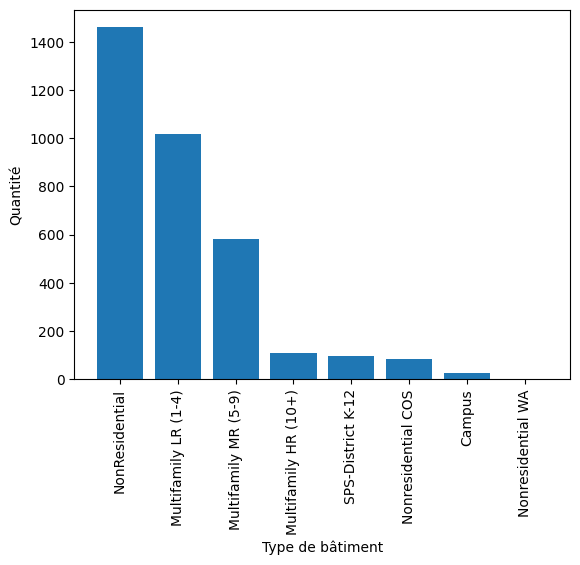

In [7]:
# Visualisation des types de bâtiment : 
x = data['BuildingType'].value_counts().index
y = data['BuildingType'].value_counts().values

plt.figure()
plt.bar(x, y)
plt.xlabel('Type de bâtiment')
plt.ylabel('Quantité')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Suppression des bâtiments résidentiels (sélection par BuildingType) : 
ls = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

data = data[~data['BuildingType'].isin(ls)]

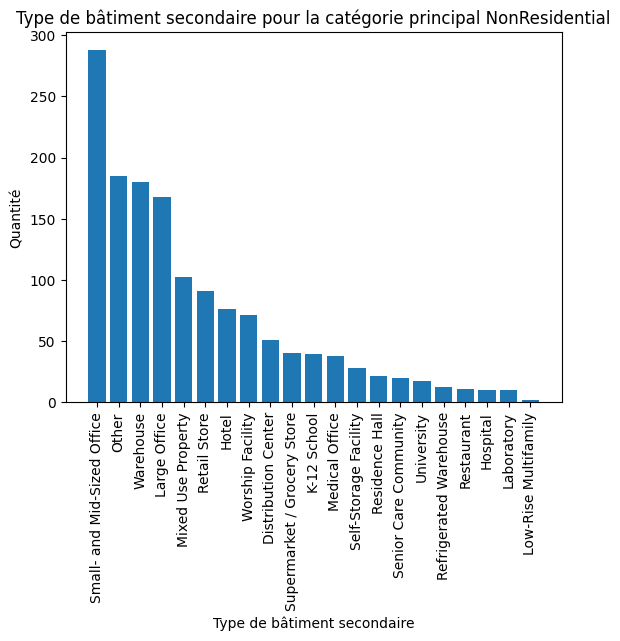

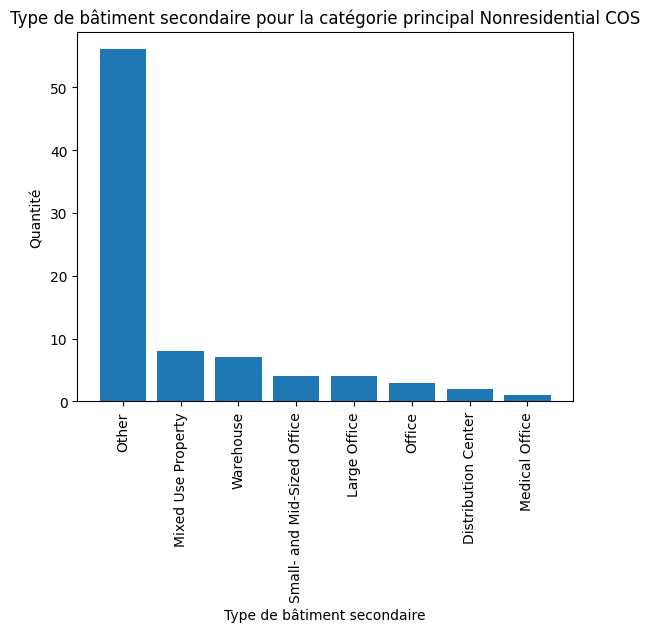

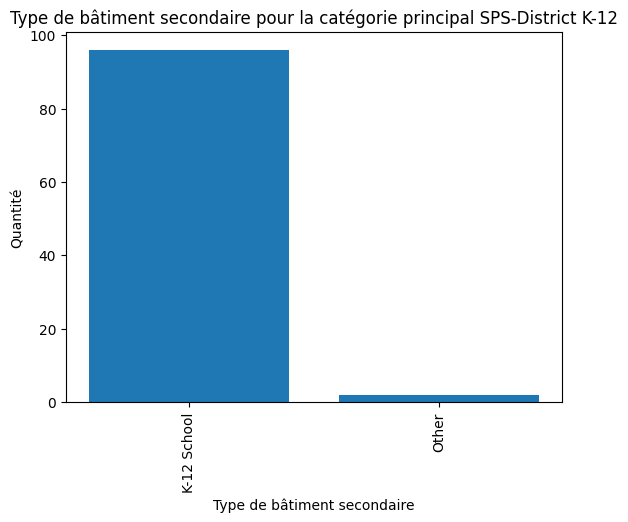

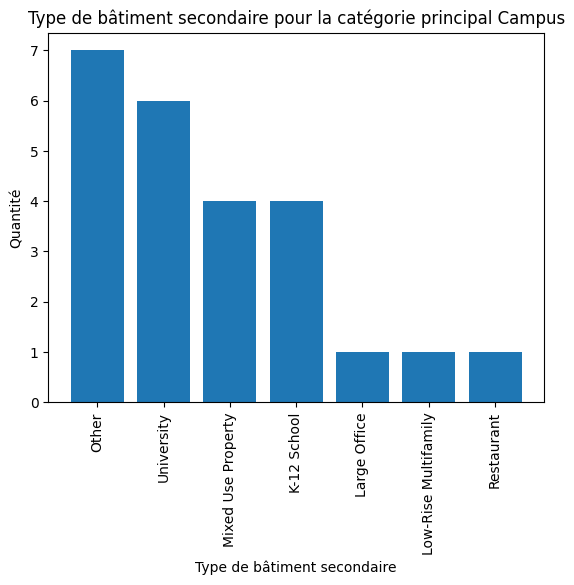

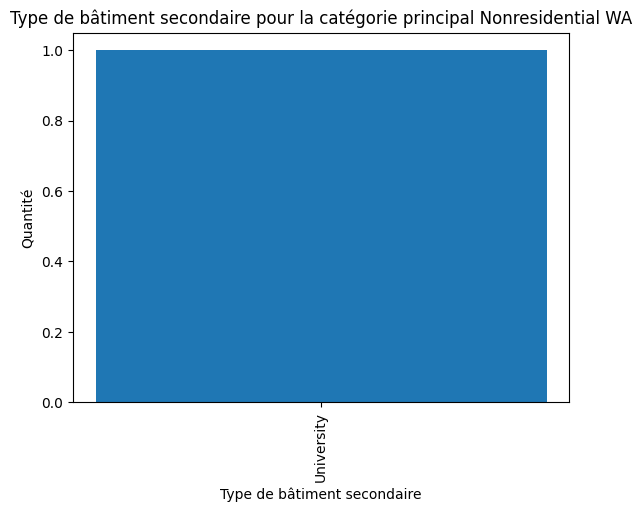

In [9]:
# Visualisation des types de bâtiment secondaire par type de bâtiment principal : 
ls = list(data['BuildingType'].unique())

for building in ls: 
    plt.figure()
    x = data.loc[data['BuildingType'] == building, 'PrimaryPropertyType'].value_counts().index
    y = data.loc[data['BuildingType'] == building, 'PrimaryPropertyType'].value_counts().values
    plt.bar(x, y)
    plt.xlabel('Type de bâtiment secondaire')
    plt.ylabel('Quantité')
    plt.title(f"Type de bâtiment secondaire pour la catégorie principal {building}")
    plt.xticks(rotation=90)
    plt.show()
    

Pour les campus, il y a certains bâtiments qui sont des bâtiments résidentiels

In [10]:
# Suppression des bâtiments résidentiels pour les campus : 

data = data[data['PrimaryPropertyType'] != 'Low-Rise Multifamily']

In [11]:
# Varification de la présence de bâtiments en doublons :
print("Nombre d'ID de bâtiment en doublons :", data['OSEBuildingID'].duplicated().sum())

Nombre d'ID de bâtiment en doublons : 0


## 5. <a id='toc5_'></a>[Variables de description des bâtiments](#toc0_)
### 5.1. <a id='toc5_1_'></a>[Sélection des colonnes string](#toc0_)

In [12]:
# Récupération des variables string servant à la description des bâtiments : 

col = list(data.select_dtypes(include='object').columns.intersection(liste_bâtiment))
print(f"Liste des noms de colonnes avec des valeurs string, servant à la description des bâtiments :\n\n", col)

Liste des noms de colonnes avec des valeurs string, servant à la description des bâtiments :

 ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


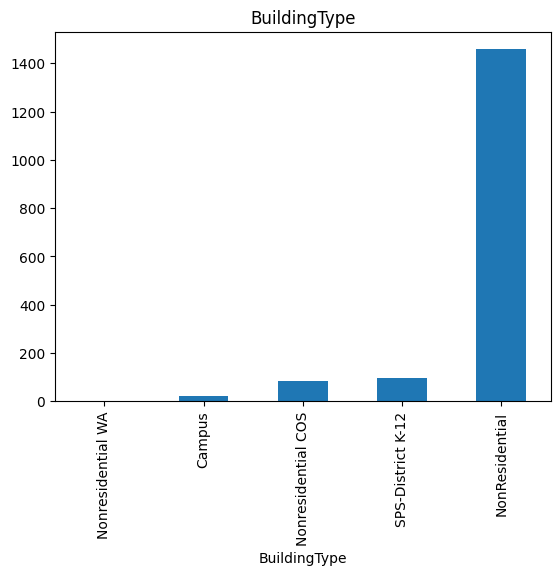

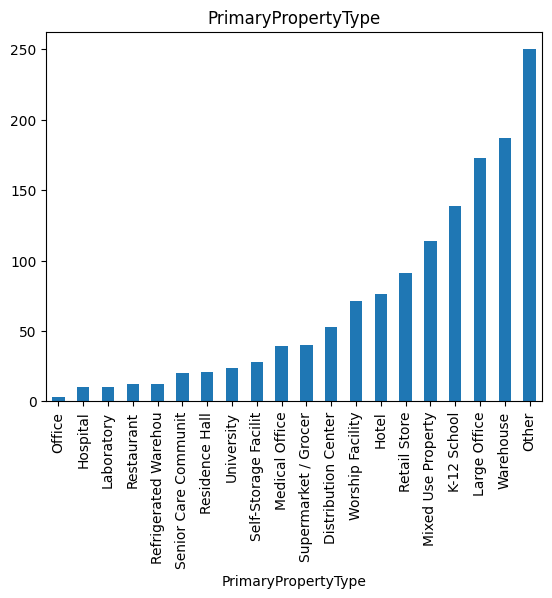

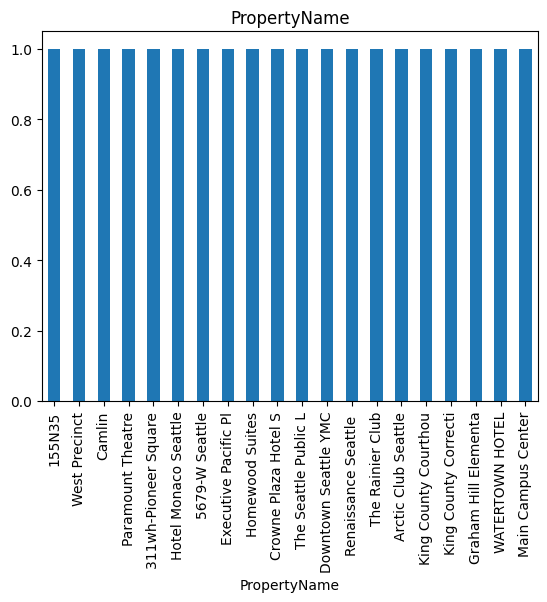

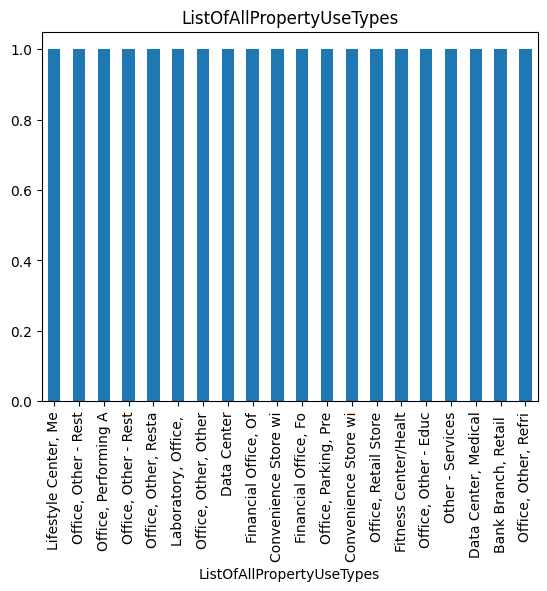

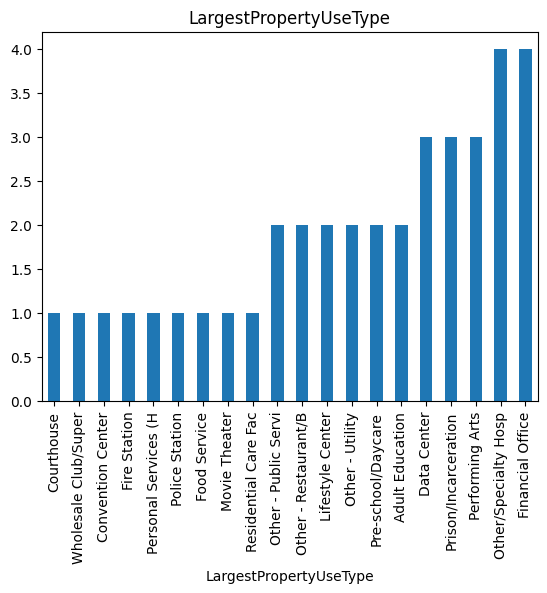

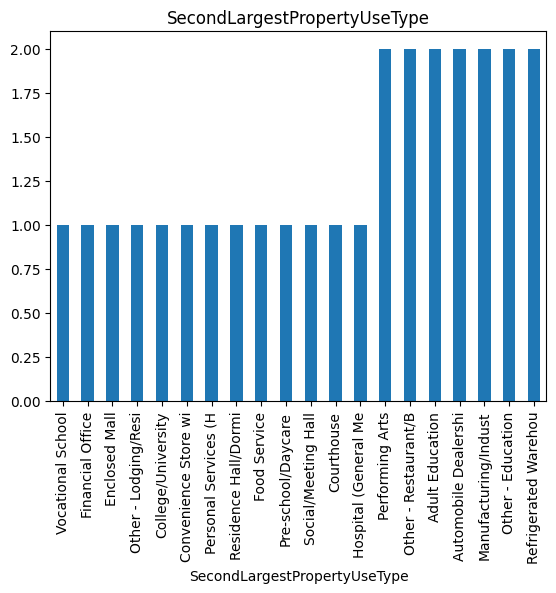

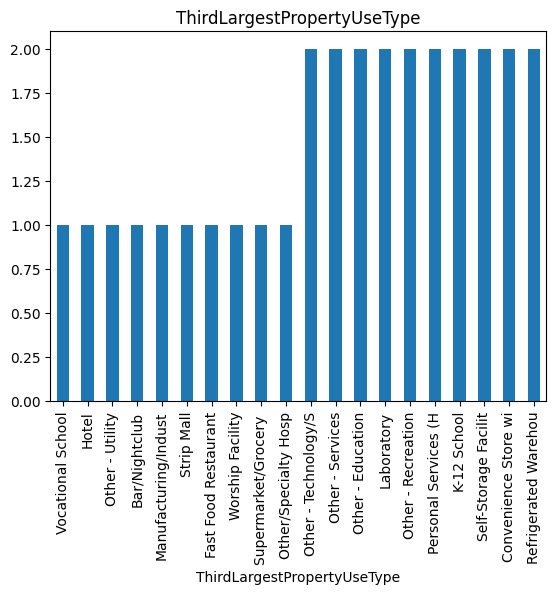

In [13]:
# Visualisation des 20 premières valeurs: 
for c in col: 
    serie = data[c].value_counts().sort_values().head(20)
    serie.index = serie.index.str.slice(0, 20)
    plt.figure()
    serie.plot(kind='bar')
    plt.title(c)
    plt.show()

Les colonnes BuildingType et PrimaryPropertyType seront donc les deux colonnes à garder 

Les autres variables non pas assez de valeurs regroupées

In [14]:
# Suppression des éléments de liste_bâtiment et data : 

col.remove('BuildingType')
col.remove('PrimaryPropertyType')

for x in col: 
    liste_bâtiment.remove(x)

data.drop(col, axis=1, inplace=True)

del col

In [15]:
# Visualisation : 
print('Nombre de variables des BuildingType :\n')
print(data['BuildingType'].value_counts())

print('--'*50)
print('Nombre de variables des PrimaryPropertyType :\n')
print(data['PrimaryPropertyType'].value_counts())


Nombre de variables des BuildingType :

BuildingType
NonResidential        1458
SPS-District K-12       98
Nonresidential COS      85
Campus                  23
Nonresidential WA        1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre de variables des PrimaryPropertyType :

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant             

In [16]:
# Remplacement de Nonresidential WA par NonResidential : 
data.loc[data['BuildingType'] == 'Nonresidential WA', 'BuildingType'] = 'NonResidential'

### 5.2. <a id='toc5_2_'></a>[Variables numériques](#toc0_)

In [17]:
# Récupération des variables numérique servant à la description des bâtiments : 

colonnes_non_string = list(data.select_dtypes(exclude='object').columns.intersection(liste_bâtiment))

print(f"Liste des noms de colonnes avec des valeurs numériques, servant à la description des bâtiments :\n\n",
      colonnes_non_string
     )

Liste des noms de colonnes avec des valeurs numériques, servant à la description des bâtiments :

 ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']


#### 5.2.1. <a id='toc5_2_1_'></a>[Années de construction](#toc0_)

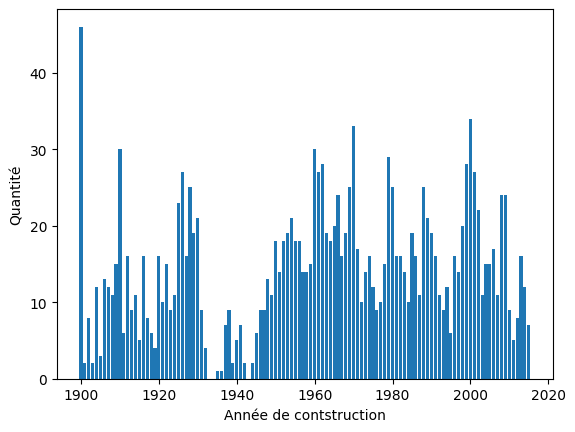

In [18]:
# Visualisation de la répartition : 
x = data['YearBuilt'].value_counts().index
y = data['YearBuilt'].value_counts().values

plt.figure()
plt.bar(x, y)
plt.xlabel("Année de contstruction")
plt.ylabel('Quantité')
plt.show()

del x, y

In [19]:
# Valeurs manquantes : 
print("Pourcentage d'années de construction manquantes :", data['YearBuilt'].isna().mean())

Pourcentage d'années de construction manquantes : 0.0


Pour garder l'inforamtion de cette variable mais avoir une explication accrue de celle-ci, préférence pour l'âge du bâtiment plutôt que l'année de construction. 

In [20]:
# Création d'une variable age_bâtiment pour remplacer par l'année de construction : 
data['age'] = 2016 - data['YearBuilt']
colonnes_non_string.append('age')
liste_bâtiment.append('age')

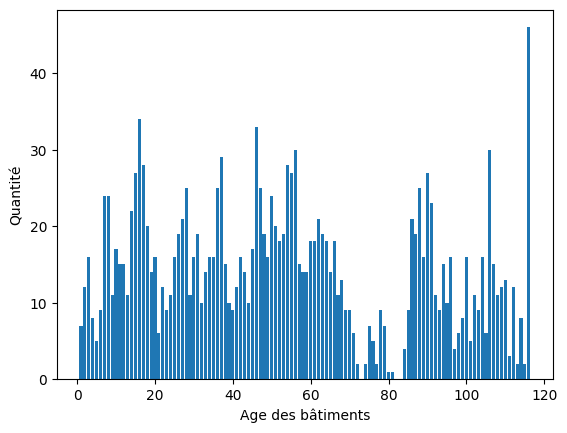

In [21]:
# Visualisation de la répartition de l'âge des bâtiemnts : 
x = data['age'].value_counts().index
y = data['age'].value_counts().values

plt.figure()
plt.bar(x, y)
plt.xlabel("Age des bâtiments")
plt.ylabel('Quantité')
plt.show()

del x, y

In [22]:
# Suppression de YearBuilt : 
data.drop('YearBuilt', axis=1, inplace=True)
liste_bâtiment.remove('YearBuilt')
colonnes_non_string.remove('YearBuilt')

#### 5.2.2. <a id='toc5_2_2_'></a>[Nombres de bâtiments](#toc0_)

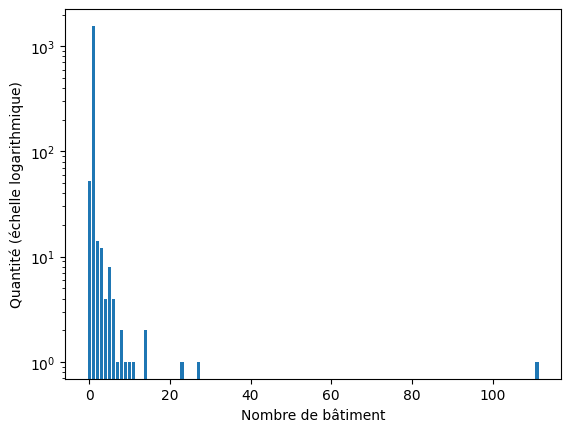

In [23]:
# Visualisation de la répartition :
x = data['NumberofBuildings'].value_counts().index
y = data['NumberofBuildings'].value_counts().values

plt.figure()
plt.bar(x, y)
plt.yscale('log')
plt.xlabel("Nombre de bâtiment")
plt.ylabel('Quantité (échelle logarithmique)')
plt.show()

del x, y

##### 5.2.2.1. <a id='toc5_2_2_1_'></a>[Valeurs extrêmes](#toc0_)
Il y a un campus comportant 111 bâtiments, ce qui est en soit possible. 

Cependant, ceci reste un cas exeptionnel. Pour un meilleur apprentissage des models sur des cas plus courant, nous supprimerons les cas où le nombre de bâtiment est supérieur à 40. 

In [24]:
# Suppression : 

index = data[data['NumberofBuildings'] > 40].index
data.drop(index, inplace=True)
del index

##### 5.2.2.2. <a id='toc5_2_2_2_'></a>[Valeurs nulles](#toc0_)

In [25]:
# Visualisation : 

nb = len(data.loc[data['NumberofBuildings'] == 0])
print(f'Il y a {nb} bâtiments avec un nombre de bâtiment à 0 ')

del nb

Il y a 52 bâtiments avec un nombre de bâtiment à 0 


Il est en théorie impossible d'avoir un nombre de bâtiment à 0. 

--> Passage en valeurs manquantes

In [26]:
# Mise à np.nan des nombre de bâtiment égal à 0 : 
data.loc[data['NumberofBuildings'] == 0, 'NumberofBuildings'] = np.nan

##### 5.2.2.3. <a id='toc5_2_2_3_'></a>[Valeurs manquantes](#toc0_)

In [27]:
# Visualisation des valeurs manquantes : 
print(f"Il y a {len(data[data['NumberofBuildings'].isna()])} batiments sans valeurs de nombre de bâtiment") 

Il y a 54 batiments sans valeurs de nombre de bâtiment


In [28]:
# Pourcentage de valeurs nulles dans les données de bâtiment : 
print('Pourcentage de valeurs nulles dans la sélection :\n')
data[colonnes_non_string].isna().mean()

Pourcentage de valeurs nulles dans la sélection :



NumberofBuildings                  0.032452
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseTypeGFA          0.003606
SecondLargestPropertyUseTypeGFA    0.487380
ThirdLargestPropertyUseTypeGFA     0.788462
age                                0.000000
dtype: float64

Les valeurs manquantes de NumbersofBuildings peuvent être remplacées par regression linéaire avec les variables NumberofFloors et PropertyGFABuilding(s)

In [29]:
# Remplacement des valeurs manquantes de NumberofBuildings : 

# Création des data avec et sans ZipCode : 
data_avec_numberofbuilding = data[data['NumberofBuildings'].notna()]
data_sans_numberofbuilding = data[data['NumberofBuildings'].isna()]

# Séparation des variables explicatives et de la variable cible : 
X_train = data_avec_numberofbuilding[['NumberofFloors', 'PropertyGFABuilding(s)']]
y_train = data_avec_numberofbuilding['NumberofBuildings']

# Création d'un modèle KNN : 
model = LinearRegression()

# Entrainnement du modèle : 
model.fit(X_train, y_train)

X_test = data_sans_numberofbuilding[['NumberofFloors', 'PropertyGFABuilding(s)']]
y_pred = model.predict(X_test)

# Passage à des valeurs arrondies entières : 
y_pred = np.round(y_pred).astype(int)

# Remplacement des valeurs dans data : 
data.loc[data['NumberofBuildings'].isna(), 'NumberofBuildings'] = y_pred

# Affichage du nombre de bâtiment encore égal à 0 : 
print("Nombre de bâtiment encore égal à 0 après remplacement :",
     len(data[data['NumberofBuildings'] == 0]))

del data_avec_numberofbuilding, data_sans_numberofbuilding, X_train, X_test, y_pred, y_train, model

Nombre de bâtiment encore égal à 0 après remplacement : 1


In [30]:
# Remplacement des valeurs encore égales à 0  par 1 : 
data.loc[data['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1

#### 5.2.3. <a id='toc5_2_3_'></a>[Nombre d'étages](#toc0_)

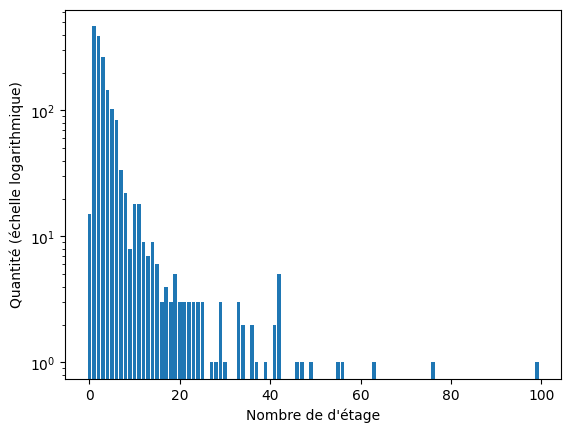

In [31]:
# Visualisation :
x = data['NumberofFloors'].value_counts().index
y = data['NumberofFloors'].value_counts().values

plt.figure()
plt.bar(x, y)
plt.yscale('log')
plt.xlabel("Nombre de d'étage")
plt.ylabel('Quantité (échelle logarithmique)')
plt.show()

In [32]:
# Valeurs manquantes : 
print("Pourcentage de nombre d'étages manquants :", data['NumberofFloors'].isna().mean())

Pourcentage de nombre d'étages manquants : 0.0


##### 5.2.3.1. <a id='toc5_2_3_1_'></a>[Valeurs extrêmes](#toc0_)
Le plus grand bâtiment de Seattle possède 77 étages.

In [33]:
# Suppression des immeubles possédant plus de 77 étages : 
data = data[data['NumberofFloors'] <= 77]

#### 5.2.4. <a id='toc5_2_4_'></a>[Relation entre les surfaces](#toc0_)
La surface total doit être égale à la surface des bâtiments + la surface des parkings.

In [34]:
# Valeurs nulles : 
print('Moyenne des valeurs nulles\n')
print(data[['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)']].isna().mean())

Moyenne des valeurs nulles

PropertyGFATotal          0.0
PropertyGFAParking        0.0
PropertyGFABuilding(s)    0.0
dtype: float64


In [35]:
# Vérification de la répartition des surfaces totales, bâtiments et parkings : 
serie_calc = data[['PropertyGFAParking', 'PropertyGFABuilding(s)']].sum(axis='columns')
nb_pb = len(data.loc[data['PropertyGFATotal'] != serie_calc])

print("Nombre de bâtiment possédant une mauvaise répartion des surface :", nb_pb)

del serie_calc, nb_pb

Nombre de bâtiment possédant une mauvaise répartion des surface : 0


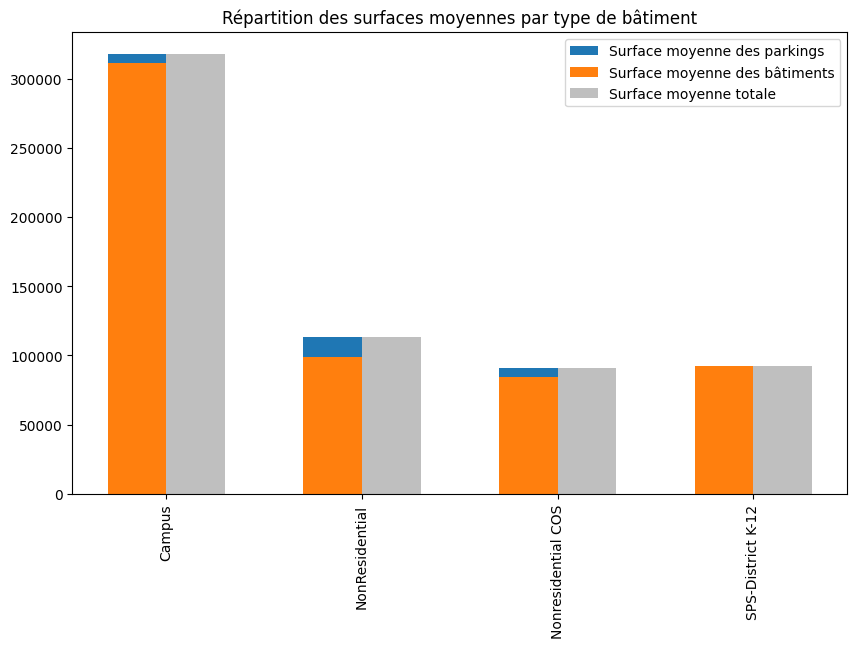

In [36]:
# Visualisation :

# Création des données : 
x = data.groupby('BuildingType')[['PropertyGFAParking', 'PropertyGFABuilding(s)']].mean()
y = data.groupby('BuildingType')['PropertyGFATotal'].mean()
positions = np.arange(len(x))
width = 0.3

# Création de la figure et de l'axe : 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Création du graph_1 - Surface parkings+bâtiments : 
ax.bar(positions - width/2, x['PropertyGFAParking'], width=width,bottom=x['PropertyGFABuilding(s)'], label='Surface moyenne des parkings')
ax.bar(positions - width/2, x['PropertyGFABuilding(s)'], width=width, label='Surface moyenne des bâtiments')

# Création du graph_2 - Surface totale : 
ax.bar(positions + width/2, y, width=width, color='gray', alpha=0.5, label='Surface moyenne totale')

# Paramètres de la figure : 
ax.set_xticks(positions)
ax.set_xticklabels(x.index)
ax.legend()
plt.xticks(rotation=90)
plt.title('Répartition des surfaces moyennes par type de bâtiment')

plt.show()

del x, y, positions, width


In [37]:
# Suppression de LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA : 
liste_bâtiment.remove('LargestPropertyUseTypeGFA')
liste_bâtiment.remove('SecondLargestPropertyUseTypeGFA')
liste_bâtiment.remove('ThirdLargestPropertyUseTypeGFA')

data.drop(['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
          axis=1, inplace=True,
         )


## 6. <a id='toc6_'></a>[Variables de localisation](#toc0_)
### 6.1. <a id='toc6_1_'></a>[Variables string](#toc0_)
#### 6.1.1. <a id='toc6_1_1_'></a>[Sélection des variables](#toc0_)

In [38]:
# Récupération des variables string servant à la localisation : 

col = list(data.select_dtypes(include='object').columns.intersection(liste_localisation))
print(f"Liste des noms de colonnes avec des valeurs string, servant à la localisation des bâtiments :\n\n", col)

Liste des noms de colonnes avec des valeurs string, servant à la localisation des bâtiments :

 ['Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood']


In [39]:
# Valeurs manquantes : 
data[col].isna().mean()

Address                          0.0
City                             0.0
State                            0.0
TaxParcelIdentificationNumber    0.0
Neighborhood                     0.0
dtype: float64

In [40]:
# Valeurs uniques par variables : 
nb_tot = len(data)
print('--'*50)
print("Nombre de lignes dans data :", nb_tot)
print('--'*50)
print('Nombre de valeurs uniques par variables :\n')
for x in col:
    nb = len(data[x].unique())
    print(f"{x} : {nb} valeurs uniques")
print('--'*50)

----------------------------------------------------------------------------------------------------
Nombre de lignes dans data : 1663
----------------------------------------------------------------------------------------------------
Nombre de valeurs uniques par variables :

Address : 1642 valeurs uniques
City : 1 valeurs uniques
State : 1 valeurs uniques
TaxParcelIdentificationNumber : 1583 valeurs uniques
Neighborhood : 19 valeurs uniques
----------------------------------------------------------------------------------------------------


Les variables Address et TaxParcelIdentificationNumber prennent beaucoup trop de valeurs différentes pour être pertinentes pour l'étude. 

De la même façon, les variables City et State n'ayant qu'une valeur unique ne sont pas pertinente. 


In [41]:
# Suppression des variables autres que Neighborhood : 
liste_localisation.remove('Address')
liste_localisation.remove('City')
liste_localisation.remove('State')
liste_localisation.remove('TaxParcelIdentificationNumber')

data.drop(['Address', 'City', 'State', 'TaxParcelIdentificationNumber'], axis=1, inplace=True)

### 6.2. <a id='toc6_2_'></a>[Variables numérique](#toc0_)

In [42]:
# Récupération des variables numériques servant à la localisation : 

col = list(data.select_dtypes(exclude='object').columns.intersection(liste_localisation))
print(f"Liste des noms de colonnes avec des valeurs numériques, servant à la localisation des bâtiments :\n\n", col)

Liste des noms de colonnes avec des valeurs numériques, servant à la localisation des bâtiments :

 ['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude']


In [43]:
# Valeurs manquantes : 
data[col].isna().mean()

ZipCode                0.009621
CouncilDistrictCode    0.000000
Latitude               0.000000
Longitude              0.000000
dtype: float64

In [44]:
# Valeurs uniques par variables : 
nb_tot = len(data)
print('--'*50)
print("Nombre de lignes dans data :", nb_tot)
print('--'*50)
print('Nombre de valeurs uniques par variables :\n')
for x in col:
    nb = len(data[x].unique())
    print(f"{x} : {nb} valeurs uniques")
print('--'*50)

----------------------------------------------------------------------------------------------------
Nombre de lignes dans data : 1663
----------------------------------------------------------------------------------------------------
Nombre de valeurs uniques par variables :

ZipCode : 49 valeurs uniques
CouncilDistrictCode : 7 valeurs uniques
Latitude : 1492 valeurs uniques
Longitude : 1403 valeurs uniques
----------------------------------------------------------------------------------------------------


Latitude, Longitude et ZipCode possèdent beaucoup de valeurs différentes, elles seront donc supprimées au profit de CouncilDistrictCode

In [45]:
# Suppression de Longitude, Latitude et ZipCode : 
liste_localisation.remove('Longitude')
liste_localisation.remove('Latitude')
liste_localisation.remove('ZipCode')

data.drop(['Longitude', 'Latitude', 'ZipCode'], axis=1, inplace=True)

#### 6.2.1. <a id='toc6_2_1_'></a>[Formatage des vairables de localisation](#toc0_)

In [46]:
# Visualisation des valeurs des variables :
print('Valeurs de Neighborhood :\n')
print(data['Neighborhood'].value_counts())
print('--'*50)
print('Valeurs de CouncilDisctrictCode :\n')
print(data['CouncilDistrictCode'].value_counts())

Valeurs de Neighborhood :

Neighborhood
DOWNTOWN                  360
GREATER DUWAMISH          345
MAGNOLIA / QUEEN ANNE     151
LAKE UNION                147
NORTHEAST                 127
EAST                      120
NORTHWEST                  81
BALLARD                    64
NORTH                      58
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Valeurs de CouncilDisctrictCode :

CouncilDistrictCode
7    528
2    396
3    202
4    171
5    132
1    119
6    115
Name: count, dtype: int64


Pour Neighborhood : 
- Remplacement de DELRIDGE NEIGHBORHOODS par DELRIDGE et modification des valeurs en majuscule. 

Pour CouncilDistricCode : 
- Passage des valeurs d'un type int à un type string

In [47]:
# Modifications de Neighboorhood : 

# Modification des valeurs en majuscule : 
data['Neighborhood'] = data['Neighborhood'].str.upper()

# Modificarion de DELRIDGE NEIGHBORHOODS : 
data.loc[data['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

In [48]:
# Modification de CouncilDistricCode : 
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('object')

## 7. <a id='toc7_'></a>[Variables Energétique](#toc0_)
### 7.1. <a id='toc7_1_'></a>[Sélection des variables](#toc0_)

In [49]:
# Valeurs manquantes : 
data[liste_energie].isna().mean().sort_index()

Electricity(kBtu)        0.001203
Electricity(kWh)         0.001203
GHGEmissionsIntensity    0.001203
NaturalGas(kBtu)         0.001203
NaturalGas(therms)       0.001203
SiteEUI(kBtu/sf)         0.001804
SiteEUIWN(kBtu/sf)       0.001804
SiteEnergyUse(kBtu)      0.001203
SiteEnergyUseWN(kBtu)    0.001804
SourceEUI(kBtu/sf)       0.001203
SourceEUIWN(kBtu/sf)     0.001203
SteamUse(kBtu)           0.001203
TotalGHGEmissions        0.001203
dtype: float64

In [50]:
# Sélection des variables cibles : 

liste_var_cible = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

print('Variables cibles du projet :')
for x in liste_var_cible: 
    print(f'- {x}')

Variables cibles du projet :
- SiteEnergyUse(kBtu)
- TotalGHGEmissions


En sélectionnant SiteEnergyUse(kBtu), cela implique l'unité des autres variables --> kBtu

In [51]:
# Relation entre Electricity(kBtu) et Electricity(kWh) : 
print('Complétion possible de Electricity(kBtu) par Electricity(kWh) :',
      len(data.loc[data['Electricity(kBtu)'].isna() & data['Electricity(kWh)'].notna()]),
     )

print('--'*50)

print('Ecrat-type du coefficient de relation entre Electricity(kBtu) par Electricity(kWh)',
      (data['Electricity(kBtu)'] / data['Electricity(kWh)']).std(),
     )

Complétion possible de Electricity(kBtu) par Electricity(kWh) : 0
----------------------------------------------------------------------------------------------------
Ecrat-type du coefficient de relation entre Electricity(kBtu) par Electricity(kWh) 0.010142743713580822


In [52]:
# Suppression de Electricity(kWh) : 
liste_energie.remove('Electricity(kWh)')

data.drop('Electricity(kWh)', axis=1, inplace=True)

In [53]:
# Relation entre NaturalGas(kBtu) et NaturalGas(therms) : 

print('Complétion possible de NaturalGas(kBtu)) par NaturalGas(therms) :',
      len(data.loc[data['NaturalGas(kBtu)'].isna() & data['NaturalGas(therms)'].notna()]),
     )

print('--'*50)

print('Ecrat-type du coefficient de relation entre NaturalGas(kBtu) par NaturalGas(therms)',
      (data['NaturalGas(kBtu)'] / data['NaturalGas(therms)']).std(),
     )

Complétion possible de NaturalGas(kBtu)) par NaturalGas(therms) : 0
----------------------------------------------------------------------------------------------------
Ecrat-type du coefficient de relation entre NaturalGas(kBtu) par NaturalGas(therms) 0.0008283871628926349


In [54]:
# Suppression de NaturalGas(therms) : 
liste_energie.remove('NaturalGas(therms)')

data.drop('NaturalGas(therms)', axis=1, inplace=True)

In [55]:
# Suppression des variables énergétiques non utiles pour la suite du projet : 

ls = ['GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)',
      'SourceEUIWN(kBtu/sf)']

print('Variables énergétiques supprimées :\n\n', ls)

for x in ls: 
    liste_energie.remove(x)

data.drop(ls, axis=1, inplace=True)

del ls

Variables énergétiques supprimées :

 ['GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']


In [56]:
# Variables restantes : 
print('--'*50)
print('Variables énergétiques retenues pour le projet :')

for x in liste_energie: 
    print(f'  - {x}')
print('--'*50)

print('Variables cibles pour le projet :')

for x in liste_var_cible: 
    print(f'  - {x}')
    
print('--'*50)

----------------------------------------------------------------------------------------------------
Variables énergétiques retenues pour le projet :
  - SteamUse(kBtu)
  - Electricity(kBtu)
  - NaturalGas(kBtu)
  - TotalGHGEmissions
  - SiteEnergyUse(kBtu)
----------------------------------------------------------------------------------------------------
Variables cibles pour le projet :
  - SiteEnergyUse(kBtu)
  - TotalGHGEmissions
----------------------------------------------------------------------------------------------------


### 7.2. <a id='toc7_2_'></a>[Traitement des variables](#toc0_)
#### 7.2.1. <a id='toc7_2_1_'></a>[Valeurs aberrantes](#toc0_)

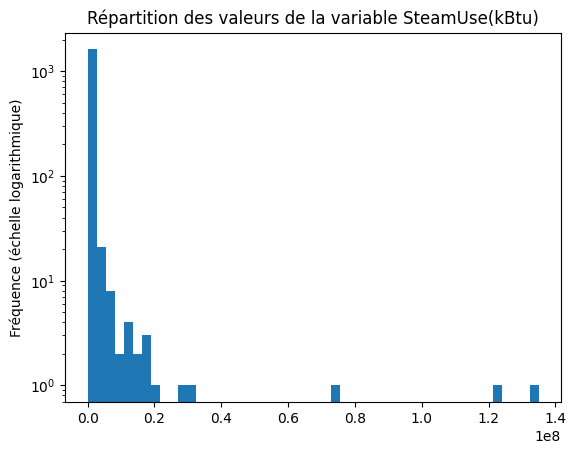

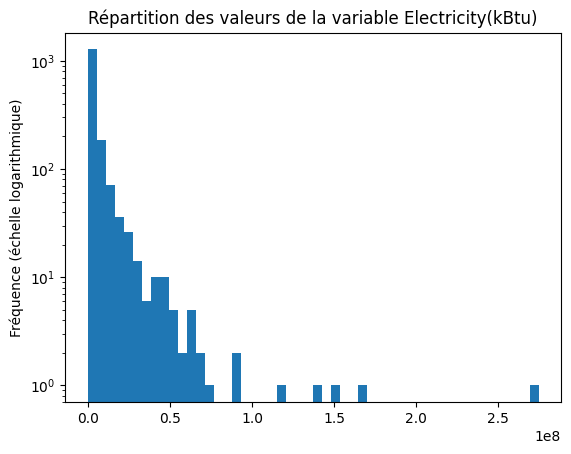

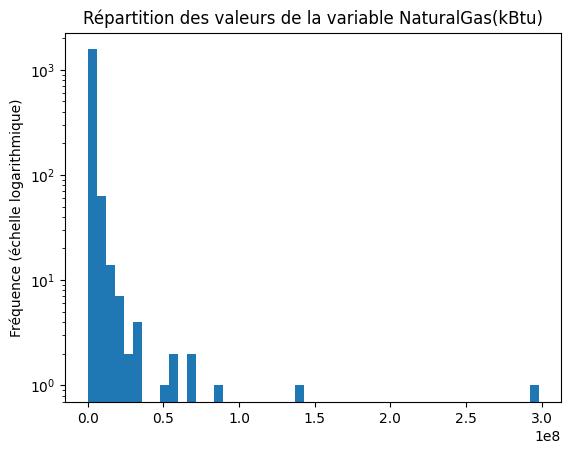

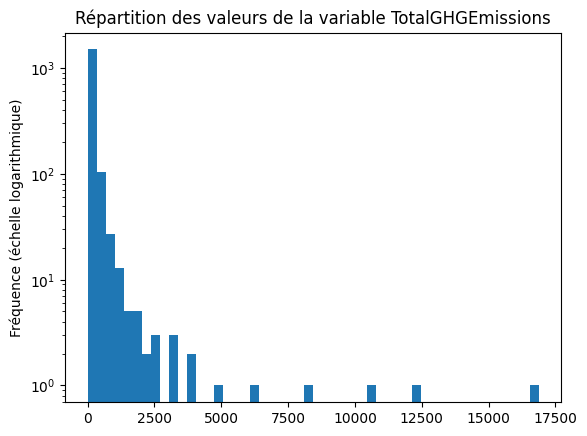

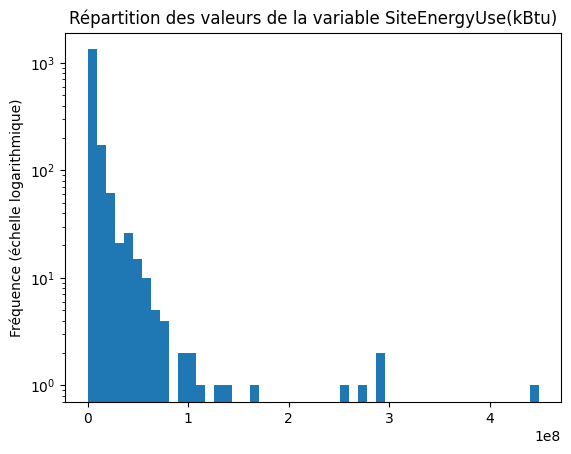

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1.661000e+03,1.661000e+03,1.661000e+03,1661.000000,1.661000e+03
mean,4.629504e+05,5.461966e+06,1.976567e+06,178.787194,7.933452e+06
std,5.117957e+06,1.334640e+07,9.384333e+06,703.390825,2.158296e+07
min,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,0.000000e+00
25%,0.000000e+00,7.224670e+05,0.000000e+00,20.080000,1.232823e+06
50%,0.000000e+00,1.611215e+06,5.038750e+05,49.620000,2.556131e+06
75%,0.000000e+00,4.855036e+06,1.522809e+06,142.390000,6.917280e+06
max,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000,4.483853e+08


In [57]:
# Visualisation de la répartition des variables : 

for x in liste_energie: 
    serie = data[x]
    plt.figure()
    serie.plot(kind='hist', bins=50)
    plt.yscale('log')
    plt.ylabel('Fréquence (échelle logarithmique)')
    plt.title(f'Répartition des valeurs de la variable {x}')
    plt.show()

data[liste_energie].describe()

Electricity est la consommation électrique totale du bâtiment (y compris la production du bâtiment si elle existe) --> impossible d'avoir une consommation négative

In [58]:
# Suppression des bâtiments avec une consommation électrique négative : 

data.drop(data[data['Electricity(kBtu)'] < 0].index,
          axis=0, inplace=True, 
         )

In [59]:
# Suppression des bâtiments avec une emission de CO2 = 0 : 

data.drop(data[data['TotalGHGEmissions'] == 0].index,
          axis=0, inplace=True,
         )

In [60]:
# Valeurs manquantes : 
data[liste_energie].isna().mean()

SteamUse(kBtu)         0.001208
Electricity(kBtu)      0.001208
NaturalGas(kBtu)       0.001208
TotalGHGEmissions      0.001208
SiteEnergyUse(kBtu)    0.001208
dtype: float64

Vérification d'une complétion possible ou non. 

In [61]:
# Suppression des bâtiments avec l'ensemble des valeurs énergétiques manquantes : 
index = data[data[liste_energie].isna().all(axis=1)].index

data.drop(index, axis=0, inplace=True)

del index

In [62]:
# Valeurs manquantes restantes : 
data[liste_energie].isna().mean()

SteamUse(kBtu)         0.0
Electricity(kBtu)      0.0
NaturalGas(kBtu)       0.0
TotalGHGEmissions      0.0
SiteEnergyUse(kBtu)    0.0
dtype: float64

In [63]:
# Visualisation des valeurs de SiteEnergyUse = 0 :  
data[data['SiteEnergyUse(kBtu)'] == 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,age
31,37,2016,SPS-District K-12,K-12 School,7,MAGNOLIA / QUEEN ANNE,1.0,2,51582,0,...,0.0,0.0,1496816.0,0.0,False,NaN,Missing Data,NaN,10.43,27
62,87,2016,SPS-District K-12,K-12 School,1,SOUTHWEST,1.0,2,53352,0,...,0.0,0.0,600813.0,0.0,False,NaN,Missing Data,NaN,4.19,68
81,118,2016,SPS-District K-12,K-12 School,1,DELRIDGE,1.0,3,74468,0,...,0.0,0.0,1698176.0,0.0,False,NaN,Missing Data,NaN,11.84,17
85,122,2016,SPS-District K-12,K-12 School,2,SOUTHEAST,1.0,2,58933,0,...,0.0,0.0,2347138.0,0.0,False,NaN,Missing Data,NaN,16.36,25
95,140,2016,SPS-District K-12,K-12 School,6,LAKE UNION,1.0,3,66588,0,...,0.0,0.0,2104286.0,0.0,False,NaN,Missing Data,NaN,14.67,25
133,217,2016,SPS-District K-12,K-12 School,6,BALLARD,1.0,1,160270,0,...,0.0,0.0,0.0,4318917.0,False,NaN,Missing Data,NaN,229.38,57
139,227,2016,SPS-District K-12,K-12 School,3,CENTRAL,1.0,3,136188,0,...,0.0,0.0,0.0,3217877.0,False,NaN,Missing Data,NaN,170.90,53
614,820,2016,SPS-District K-12,K-12 School,3,CENTRAL,1.0,1,52924,0,...,0.0,0.0,1957268.0,0.0,False,NaN,Missing Data,NaN,13.64,28
630,850,2016,SPS-District K-12,K-12 School,3,CENTRAL,1.0,3,55353,0,...,0.0,0.0,1433596.0,0.0,False,NaN,Missing Data,NaN,9.99,28
1894,23722,2016,SPS-District K-12,K-12 School,6,BALLARD,1.0,1,39971,0,...,0.0,0.0,0.0,945537.0,False,NaN,Missing Data,NaN,50.22,58


En théorie, SiteEnergyUse = SteamUse + Electricity + NaturalGas 

--> Apllication de cette règle pour les SiteEnergyUse = 0 

In [64]:
# Traitement des valeurs SiteEnergyUse = 0 : 
index = data[data['SiteEnergyUse(kBtu)'] == 0].index 

electricity = data['Electricity(kBtu)']
gas = data['NaturalGas(kBtu)']
steam = data['SteamUse(kBtu)']

data.loc[index, 'SiteEnergyUse(kBtu)'] = electricity[index] + gas[index] + steam[index]

del index, electricity, gas, steam

#### 7.2.2. <a id='toc7_2_2_'></a>[Vérification de la cohérence des consomations d'énergies](#toc0_)
Régle : SiteEnergyUse = SteamUse + Electricity + NaturalGas

In [65]:
# Vérification de la cohérence des consommations d'énrgies : 

ls = ['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)']


serie_calc = data[ls].sum(axis=1)

serie_energy_out = ~serie_calc.between(data['SiteEnergyUse(kBtu)']*0.95, data['SiteEnergyUse(kBtu)']*1.05)

nb = len(data[serie_energy_out])
nb_tot = len(data)

print('--'*50)
print("Nombre de lignes dans data :", nb_tot, '\n')
print('Nombre de lignes possèdant une incohérance sur la relation entre les consommations énergétiques :', nb)
print('--'*50)
print("Marge d'erreur prise [95%-105%]")
print('--'*50)
print('Visualisaion des bâtiments en question :')
data[serie_energy_out]

----------------------------------------------------------------------------------------------------
Nombre de lignes dans data : 1654 

Nombre de lignes possèdant une incohérance sur la relation entre les consommations énergétiques : 16
----------------------------------------------------------------------------------------------------
Marge d'erreur prise [95%-105%]
----------------------------------------------------------------------------------------------------
Visualisaion des bâtiments en question :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,age
69,103,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,1,389000,0,...,2.365898e+07,6093150.0,14419146.0,688680.0,False,NaN,Compliant,NaN,607.41,54
71,106,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,5,396085,0,...,2.095503e+07,9763690.0,7252325.0,0.0,False,NaN,Compliant,NaN,804.20,78
73,110,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,2,52000,0,...,2.726369e+06,1202380.0,1293349.0,0.0,False,NaN,Compliant,NaN,101.83,54
75,112,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,2,262048,0,...,2.072325e+07,5137220.0,13512686.0,0.0,False,NaN,Compliant,NaN,490.73,88
403,561,2016,NonResidential,Large Office,7,LAKE UNION,1.0,6,336700,124800,...,9.058916e+06,0.0,7877393.0,0.0,False,NaN,Compliant,NaN,54.92,11
448,608,2016,NonResidential,Large Office,2,DOWNTOWN,5.0,7,154159,0,...,1.119592e+07,0.0,1608768.0,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,103
563,757,2016,NonResidential,Large Office,7,DOWNTOWN,1.0,7,131143,87160,...,5.177270e+06,0.0,4871126.0,1416041.0,False,NaN,Compliant,NaN,109.16,37
601,803,2016,NonResidential,Small- and Mid-Sized Office,1,DELRIDGE,1.0,3,85126,0,...,3.795171e+07,0.0,18610055.0,685132.0,False,NaN,Compliant,NaN,166.13,87
1280,21436,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,2,40600,0,...,2.485521e+06,137900.0,1509514.0,374537.0,False,NaN,Compliant,NaN,41.06,24
1292,21465,2016,Nonresidential COS,Other,7,DOWNTOWN,1.0,1,36314,0,...,1.832809e+06,204650.0,1110431.0,391578.0,False,NaN,Compliant,NaN,44.33,54


In [66]:
# Suppression de ces bâtiments : 

index = data[serie_energy_out].index

data.drop(index, axis=0, inplace=True)

del index, ls, serie_calc, serie_energy_out, nb, nb_tot

## 8. <a id='toc8_'></a>[Finalisation de data](#toc0_)

In [67]:
# Suppression des variables non utiles restantes : 

# Création des listes : 
liste_bâtiment.insert(0, 'OSEBuildingID')
ls = liste_bâtiment + liste_localisation + liste_energie + liste_energystar

# Création de data filté : 
data = data.loc[:, ls]

del ls, liste_autre, liste_bâtiment, liste_energie, liste_energystar, liste_localisation, liste_var_cible

In [68]:
#Types de colonnes : 
data.dtypes

OSEBuildingID                 int64
BuildingType                 object
PrimaryPropertyType          object
NumberofBuildings           float64
NumberofFloors                int64
PropertyGFATotal              int64
PropertyGFAParking            int64
PropertyGFABuilding(s)        int64
age                           int64
CouncilDistrictCode          object
Neighborhood                 object
SteamUse(kBtu)              float64
Electricity(kBtu)           float64
NaturalGas(kBtu)            float64
TotalGHGEmissions           float64
SiteEnergyUse(kBtu)         float64
YearsENERGYSTARCertified     object
ENERGYSTARScore             float64
dtype: object

In [69]:
# Changement du type de données de NumberofBuildings en valeurs entières : 
data['NumberofBuildings'] = data['NumberofBuildings'].astype(int)

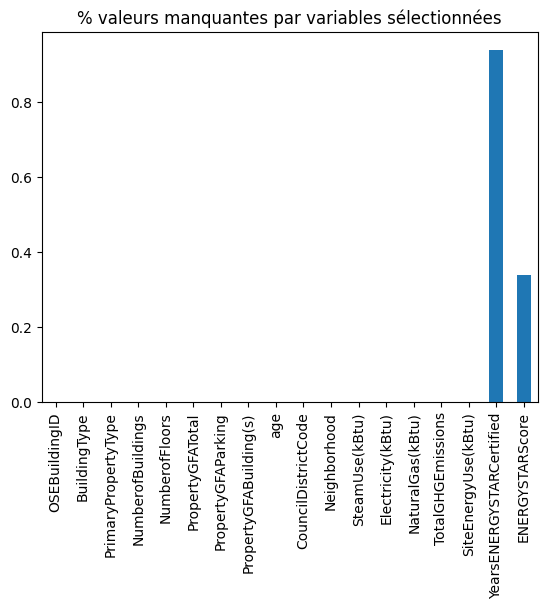

In [70]:
# Visualisation de data :
plt.figure()
data.isna().mean().plot(kind='bar')
plt.title('% valeurs manquantes par variables sélectionnées')
plt.show()

In [71]:
# Ratio d'élimination de variables : 

nb_li_data = len(data)
nb_li_data_b = len(data_base)
nb_col_data = len(data.columns)
nb_col_data_b = len(data_base.columns)

ratio_var = 1 - nb_col_data/nb_col_data_b
ratio_bati = 1 - nb_li_data/nb_li_data_b

print('--'*50)
print(f'Réduction du nombre de variables : {ratio_var*100:.2f} %')
print(f'Réduction du nombre de bâtiment (non exploitables) : {ratio_bati*100:.2f} %')
print('--'*50)

del nb_col_data, nb_col_data_b, nb_li_data, nb_li_data_b, ratio_bati, ratio_var

----------------------------------------------------------------------------------------------------
Réduction du nombre de variables : 60.87 %
Réduction du nombre de bâtiment (non exploitables) : 51.48 %
----------------------------------------------------------------------------------------------------


## Analyse exploratoire
### 9. <a id='toc9_'></a>[Matrice de corrélation](#toc0_)

<Axes: title={'center': 'Matrice de corrélation'}>

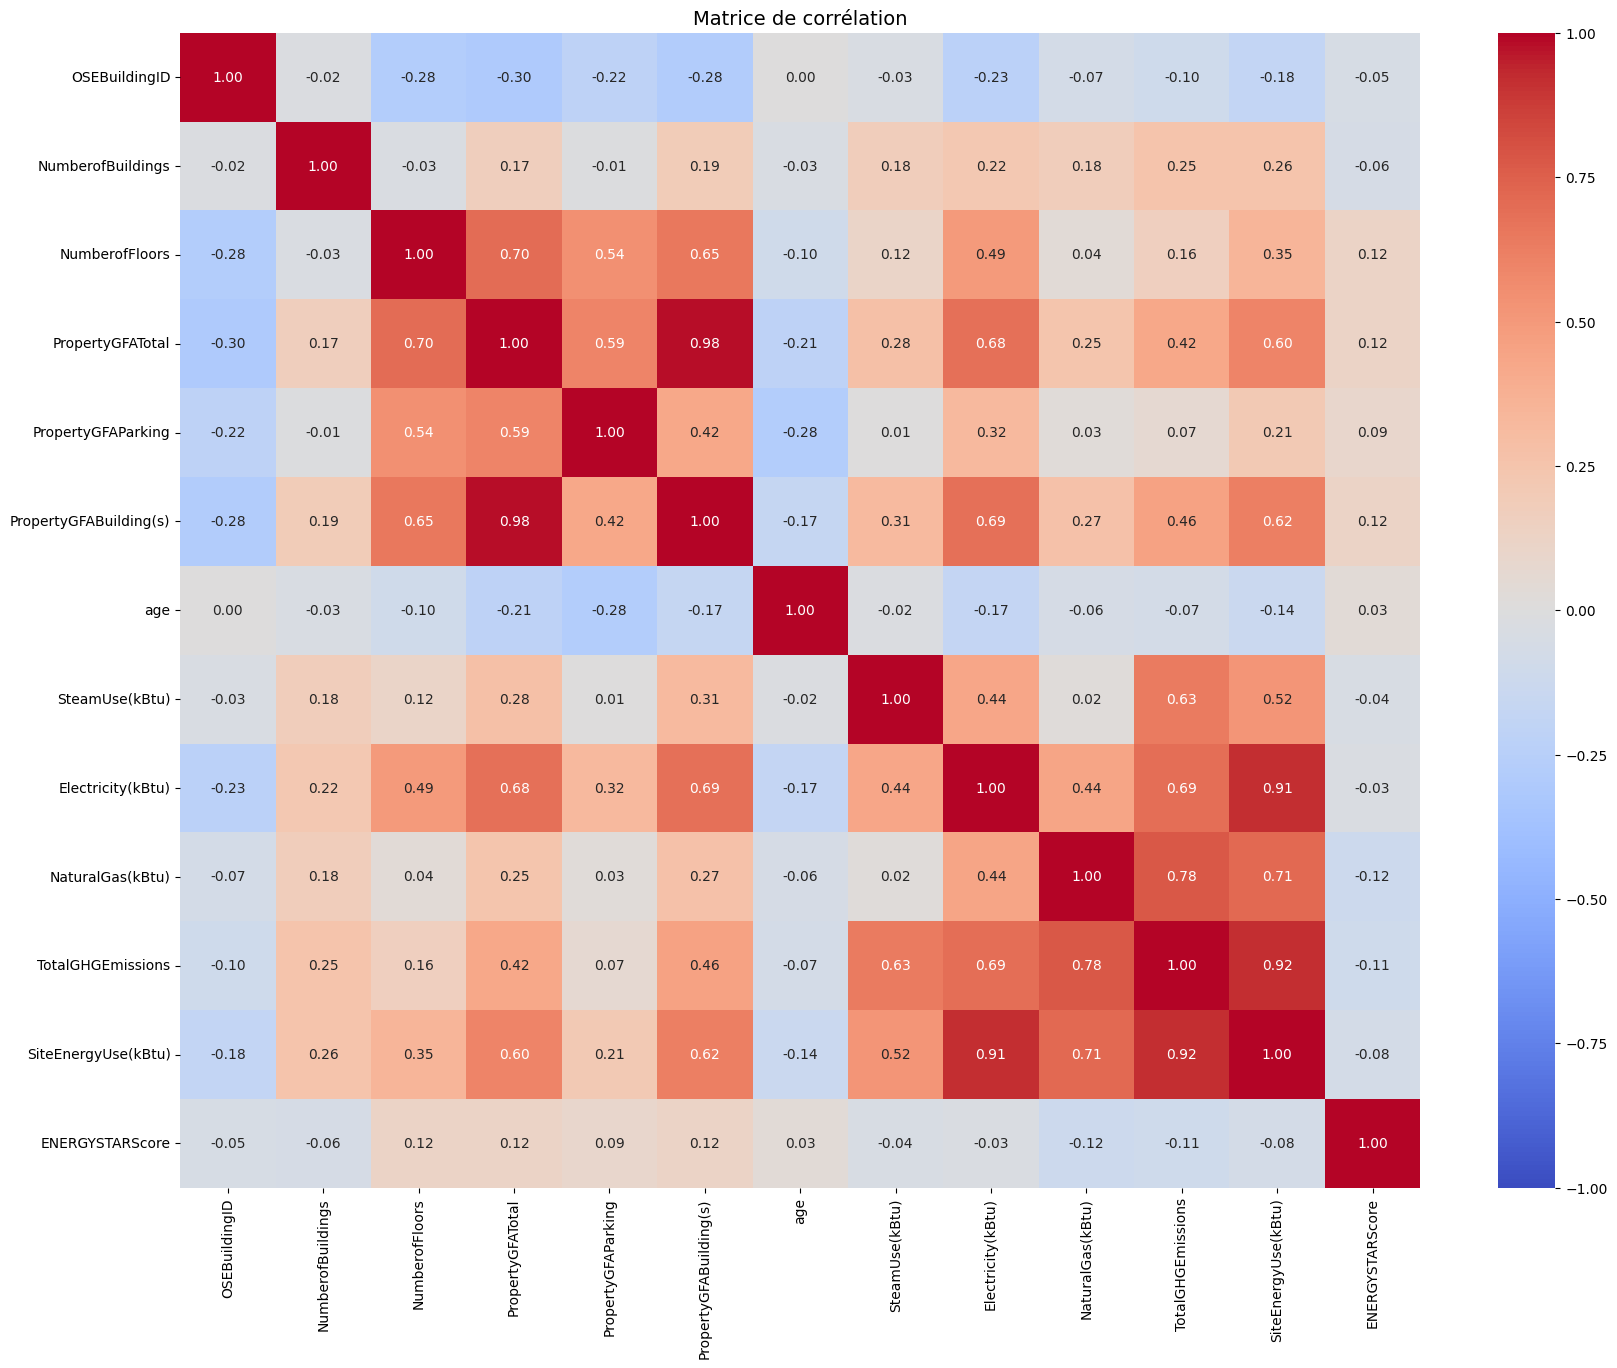

In [72]:
# Matrice de corrélation des variables numériques : 
# Sélection des variables numériques : 
colonnes_numeriques = data.select_dtypes(include='number')

# Création de la matrice de corrélation : 
matrice_correlation = colonnes_numeriques.corr()

fig, ax = plt.subplots(figsize=(20, 15))
plt.title('Matrice de corrélation', fontsize=14)
sns.heatmap(matrice_correlation, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Par rapport aux cibles, SiteEnergyUse et TotaGHEGEmissions : 
- Forte corrélation avec les surfaces, nombres de bâtiments, nombres d'étages --> les parkings ont peu d'influence sur les emissions de CO2
- Forte corrélation avec les consomation d'énergie (électricité, gaz, vapeur...) --> logique puisque calculé à partir de ces variables
- Légère corrélation avec l'age du bâtiment

Corrélation ectrêment forte entre Emissions de CO2 et consommation d'énergie. 

### 10. <a id='toc10_'></a>[TotalGHGEmissions vs SiteEnergyUse](#toc0_)

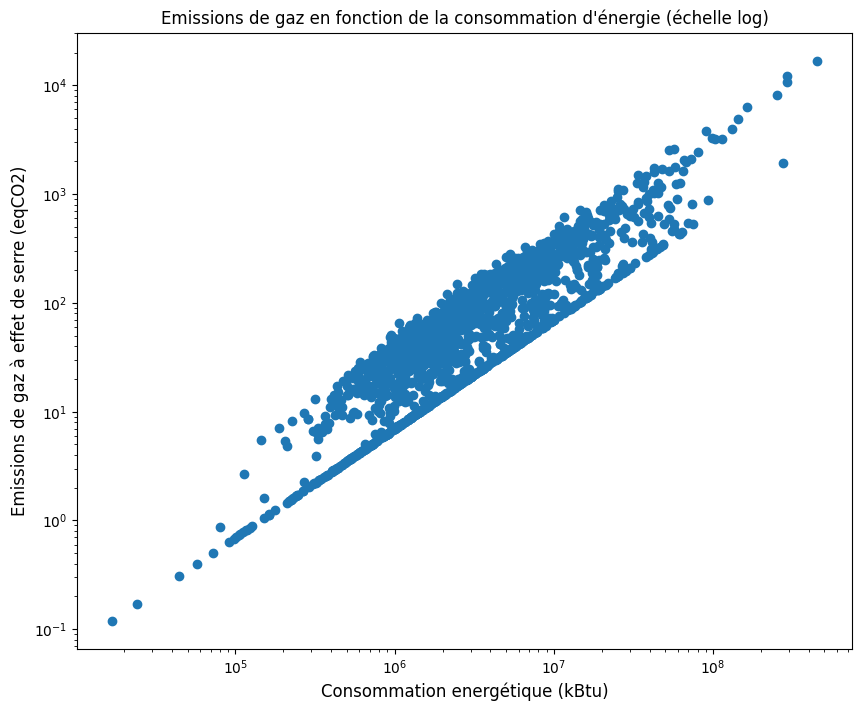

In [73]:
# Visualiation de TotalGHGEmissions en fonction de SiteEnergyUse : 

# création des séries : 
emmissions = data['TotalGHGEmissions']
energy = data['SiteEnergyUse(kBtu)']


plt.figure(figsize=(10, 8))

plt.scatter(x=energy, y= emmissions)
plt.xlabel('Consommation energétique (kBtu)', fontsize=12)
plt.ylabel('Emissions de gaz à effet de serre (eqCO2)', fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.title("Emissions de gaz en fonction de la consommation d'énergie (échelle log)", fontsize=12)


plt.show()

del emmissions, energy

In [74]:
# Corrélation entre les variables : 

coef_pearson = data['TotalGHGEmissions'].corr(data['SiteEnergyUse(kBtu)'])

print("Coefficient de pearson entre les emissions de gaz à effet de serre  et la concommation d'energie :", coef_pearson)
del coef_pearson

Coefficient de pearson entre les emissions de gaz à effet de serre  et la concommation d'energie : 0.9173271278964553


Les deux variables cibles sont très fortement liées linéairement l'une par rapport à l'autre.

### 11. <a id='toc11_'></a>[Propriétés du bâtiment vs variables cibles](#toc0_)

In [75]:
# Création d'une liste : 
ls_prop_bat = list(data.columns[1:9])
print('Les différentes variables de propriétés des bpatiments :\n')

x =''
for i in ls_prop_bat: 
    x += i +' | '
print(x)

Les différentes variables de propriétés des bpatiments :

BuildingType | PrimaryPropertyType | NumberofBuildings | NumberofFloors | PropertyGFATotal | PropertyGFAParking | PropertyGFABuilding(s) | age | 


#### 11.1. <a id='toc11_1_'></a>[Diagrammes de dispersion entre TotalGHGEmissions et valeurs numériques](#toc0_)

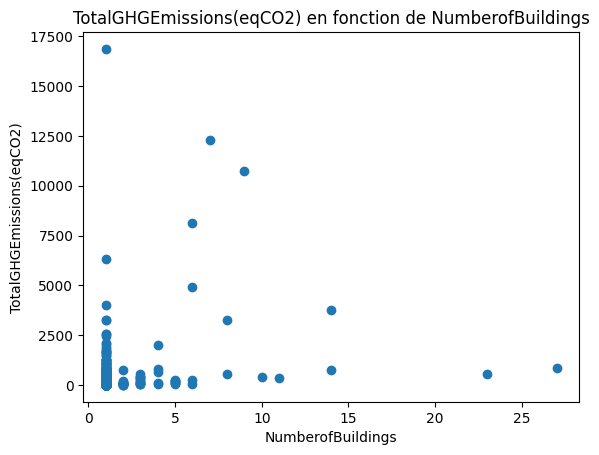

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et NumberofBuildings : 0.252374484102268


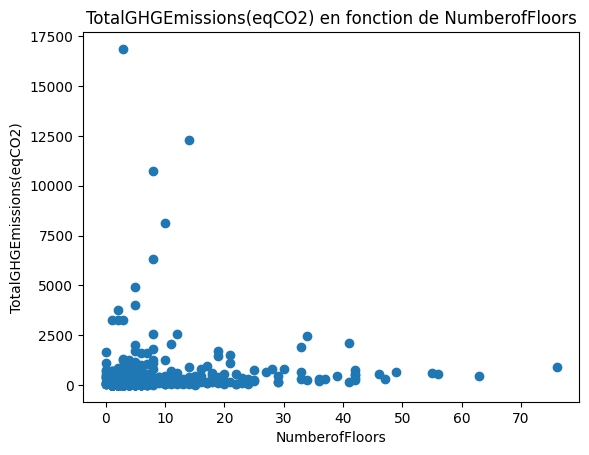

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et NumberofFloors : 0.15745354034025422


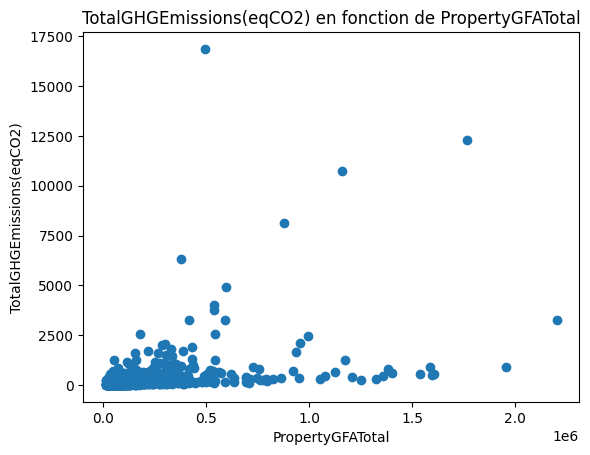

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et PropertyGFATotal : 0.4225769385314891


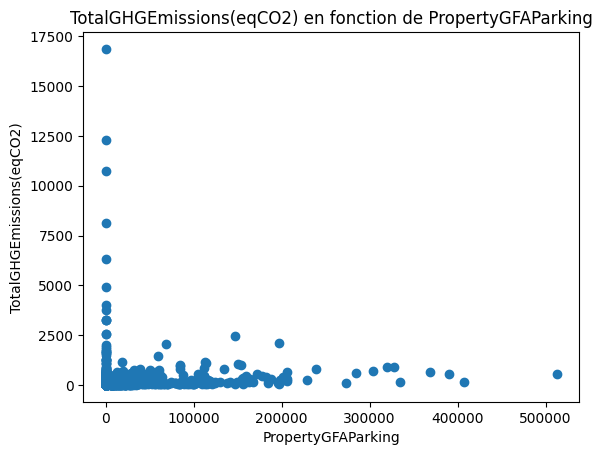

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et PropertyGFAParking : 0.065472353184615


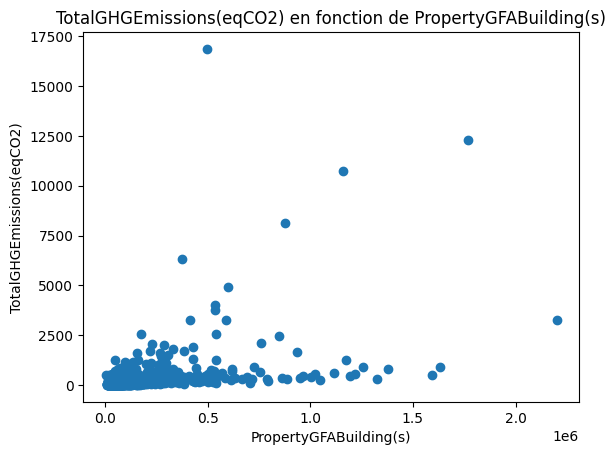

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et PropertyGFABuilding(s) : 0.46030010406542604


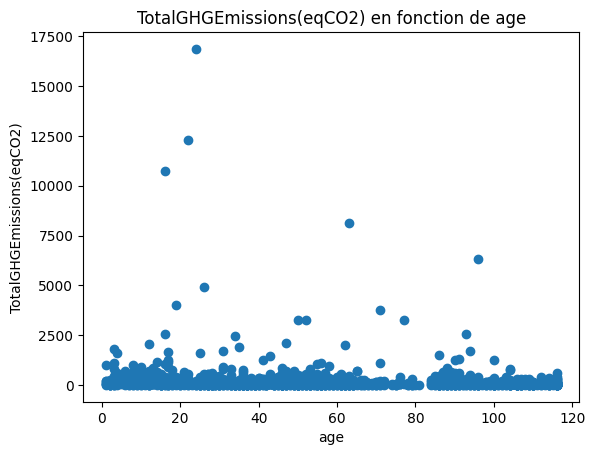

Coefficient de pearson entre TotalGHGEmissions(eqCO2)  et age : -0.07270442761586822


In [76]:
# Visualisation des diagrammes de dispersion et du coef de pearson : 
emission = data['TotalGHGEmissions']
name = 'TotalGHGEmissions(eqCO2)'

for var in list(data.select_dtypes(exclude='object').columns.intersection(ls_prop_bat)):
    plt.figure()
    plt.scatter(x=data[var], y=emission)
    plt.title(f"{name} en fonction de {var}")
    plt.ylabel(name)
    plt.xlabel(var)
    plt.show()
    
    coef_pearson = emission.corr(data[var])
    print(f"Coefficient de pearson entre {name}  et {var} : {coef_pearson}")
    

    

Malgrés  les coefficients de corrélation parfois important (46%, 42%..) 

TotalGHGEmissions et les variables numériques de propriétés des bâtiments ne sont pas directement liées linéairement.

#### 11.2. <a id='toc11_2_'></a>[Relation entre TotalGHGEmissions et les variables catégorielles](#toc0_)

In [77]:
# Création de variables d'émissions de CO2 normalisées :

# Modification de NumberpfFloors pour avoir ne pas avoir de 0 (Rdc égal 1) :  
data['NumberofFloors'] = data['NumberofFloors'] + 1

# Création de ratio de surface : 
data['ratio_surface_bâtiment'] = data['PropertyGFABuilding(s)'] / data['PropertyGFATotal']
data['ratio_surface_parking'] = data['PropertyGFAParking'] / data['PropertyGFATotal']

# Création des emissions normalisées : 
data['Emissions_par_batiment'] = data['TotalGHGEmissions'] / data['NumberofBuildings']
data['Emissions_par_etage'] = data['TotalGHGEmissions'] / data['NumberofFloors']
data['Emissions_par_surface'] = data['TotalGHGEmissions']*data['ratio_surface_bâtiment'] / data['PropertyGFABuilding(s)']

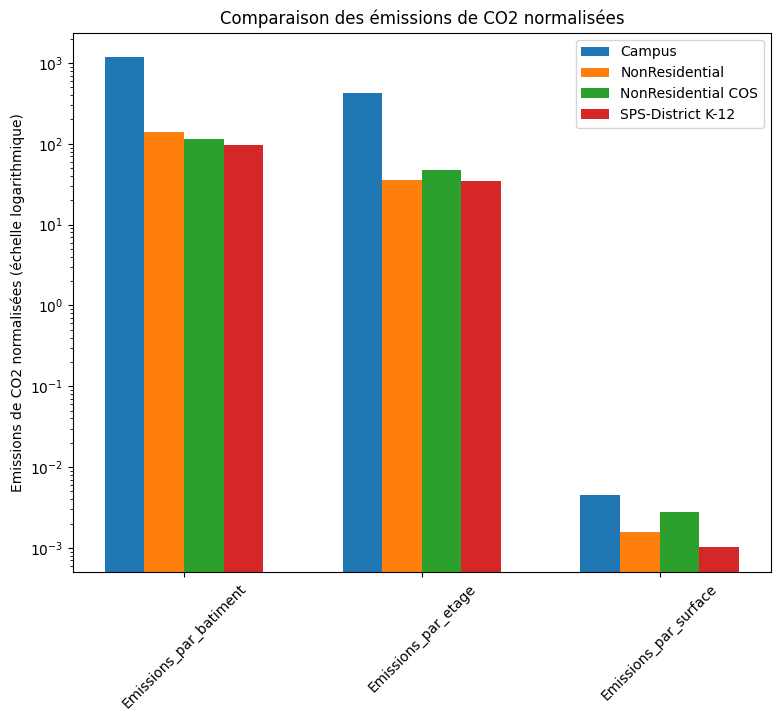

In [78]:
# Visualisation : 

# Création des données : 
grouped_data = data.groupby('BuildingType')[['Emissions_par_batiment', 'Emissions_par_etage', 'Emissions_par_surface']].mean()
width = 1/6
legend_x = list(grouped_data.columns)
campus = grouped_data.iloc[0, :]
non_residential = grouped_data.iloc[1, :]
non_residential_COS = grouped_data.iloc[2, :]
SPS  = grouped_data.iloc[3, :]


# Création de la figure : 
fig, ax = plt.subplots(figsize=(9,7))

# Création des graphiques : 
ax.bar(x=list(n-1.5*width for n in range(len(legend_x))), height=campus.values, width=width, label='Campus')
ax.bar(x=list(n-0.5*width for n in range(len(legend_x))), height=non_residential, width=width, label='NonResidential')
ax.bar(x=list(n+0.5*width for n in range(len(legend_x))), height=non_residential_COS, width=width, label='NonResidential COS')
ax.bar(x=list(n+1.5*width for n in range(len(legend_x))), height=SPS, width=width, label='SPS-District K-12')

# Création des xticks
ax.set_xticks(list(n for n in range(len(legend_x))), legend_x)

# Propriétés du graphique : 
plt.title('Comparaison des émissions de CO2 normalisées')
plt.xticks(rotation=45)
plt.ylabel('Emissions de CO2 normalisées (échelle logarithmique)')
plt.yscale('log')
plt.legend()

plt.show()

#### 11.3. <a id='toc11_3_'></a>[Diagrammes de dispersion entre SiteEnergyUse et valeurs numériques](#toc0_)

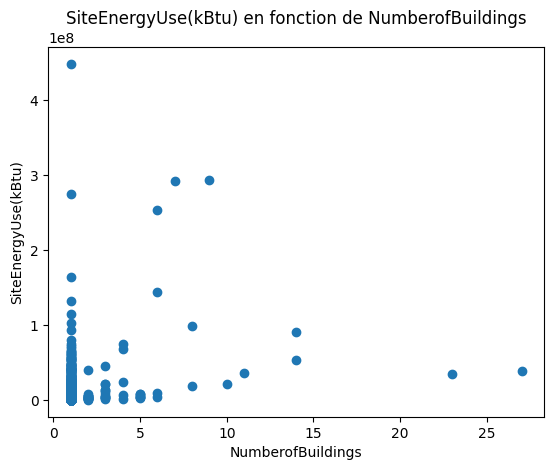

Coefficient de pearson entre SiteEnergyUse(kBtu)  et NumberofBuildings : 0.25513390170580236


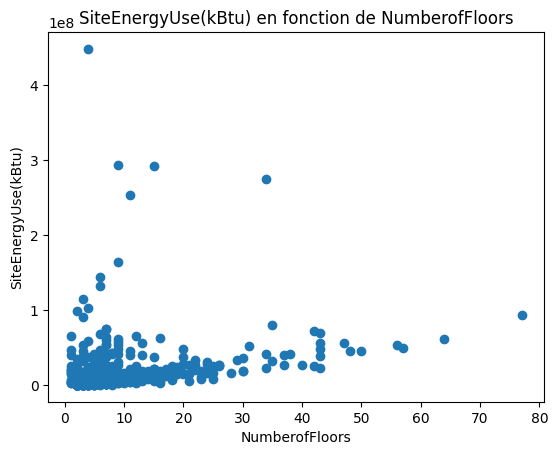

Coefficient de pearson entre SiteEnergyUse(kBtu)  et NumberofFloors : 0.35027412162201116


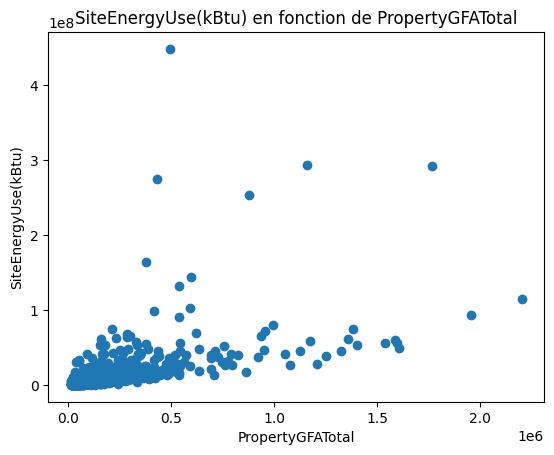

Coefficient de pearson entre SiteEnergyUse(kBtu)  et PropertyGFATotal : 0.5957133545883837


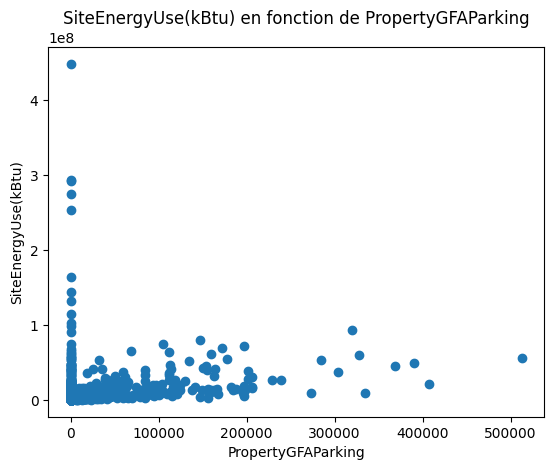

Coefficient de pearson entre SiteEnergyUse(kBtu)  et PropertyGFAParking : 0.21389049002790766


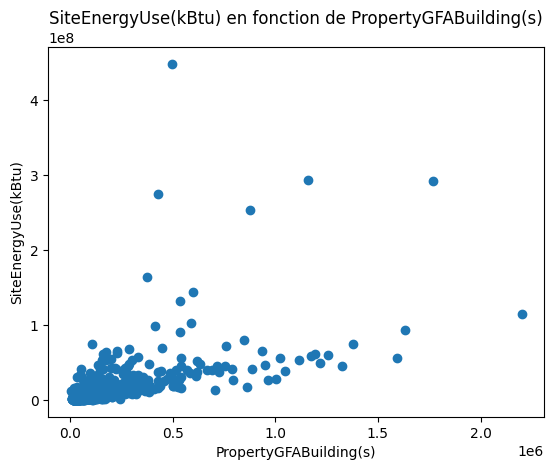

Coefficient de pearson entre SiteEnergyUse(kBtu)  et PropertyGFABuilding(s) : 0.6186284944056887


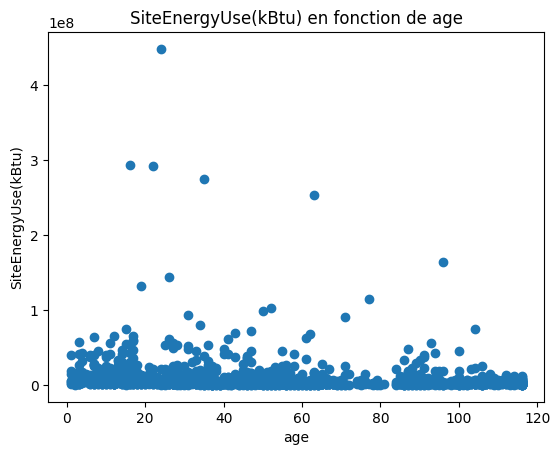

Coefficient de pearson entre SiteEnergyUse(kBtu)  et age : -0.13598848137369926


In [79]:
# Visualisation des diagrammes de dispersion et du coef de pearson : 
consommation = data['SiteEnergyUse(kBtu)']
name = 'SiteEnergyUse(kBtu)'

for var in list(data.select_dtypes(exclude='object').columns.intersection(ls_prop_bat)):
    plt.figure()
    plt.scatter(x=data[var], y=consommation)
    plt.title(f"{name} en fonction de {var}")
    plt.ylabel(name)
    plt.xlabel(var)
    plt.show()
    
    coef_pearson = consommation.corr(data[var])
    print(f"Coefficient de pearson entre {name}  et {var} : {coef_pearson}")


SiteEnergyUse est liée linéairement avec les surfaces de bâtiments et les nombres d'étages (même si la régression linéaire n'est pas parfaite)

#### 11.4. <a id='toc11_4_'></a>[Relation entre SiteEnergyUse et les variables catégorielles](#toc0_)

In [80]:
# Création de variables de cosommation normalisées : 

data['Consommation_par_batiment'] = data['SiteEnergyUse(kBtu)'] / data['NumberofBuildings']
data['Consommation_par_etage'] = data['SiteEnergyUse(kBtu)'] / data['NumberofFloors']
data['Consommation_par_surface'] = data['SiteEnergyUse(kBtu)']*data['ratio_surface_bâtiment'] / data['PropertyGFABuilding(s)']

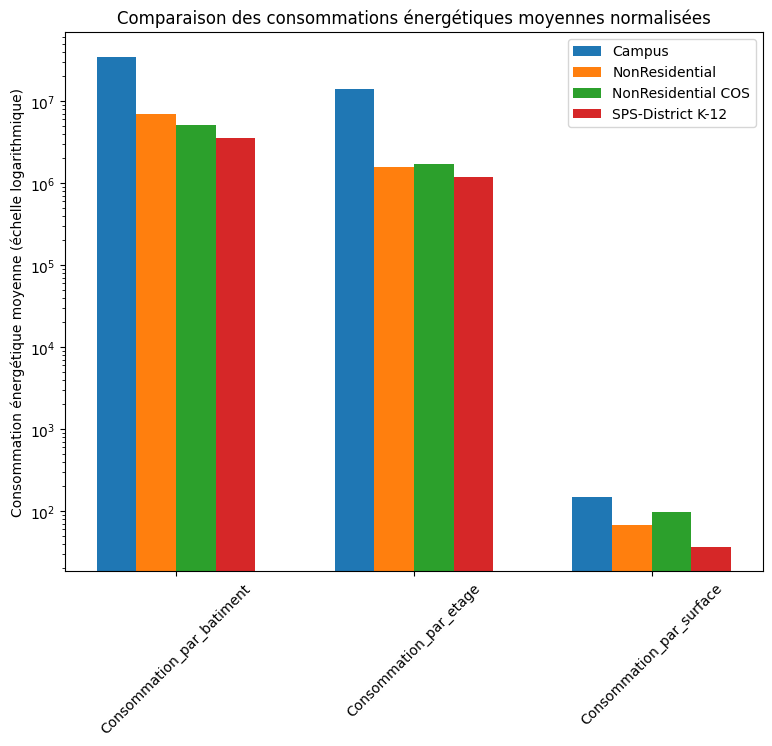

In [81]:
# Visualisation : 

# Création des données : 
grouped_data = data.groupby('BuildingType')[['Consommation_par_batiment', 'Consommation_par_etage', 'Consommation_par_surface']].mean()
width = 1/6
legend_x = list(grouped_data.columns)
campus = grouped_data.iloc[0, :]
non_residential = grouped_data.iloc[1, :]
non_residential_COS = grouped_data.iloc[2, :]
SPS  = grouped_data.iloc[3, :]


# Création de la figure : 
fig, ax = plt.subplots(figsize=(9,7))

# Création des graphiques : 
ax.bar(x=list(n-1.5*width for n in range(len(legend_x))), height=campus.values, width=width, label='Campus')
ax.bar(x=list(n-0.5*width for n in range(len(legend_x))), height=non_residential, width=width, label='NonResidential')
ax.bar(x=list(n+0.5*width for n in range(len(legend_x))), height=non_residential_COS, width=width, label='NonResidential COS')
ax.bar(x=list(n+1.5*width for n in range(len(legend_x))), height=SPS, width=width, label='SPS-District K-12')

# Création des xticks
ax.set_xticks(list(n for n in range(len(legend_x))), legend_x)

# Propriétés du graphique : 
plt.title('Comparaison des consommations énergétiques moyennes normalisées')
plt.xticks(rotation=45)
plt.ylabel('Consommation énergétique moyenne (échelle logarithmique)')
plt.yscale('log')
plt.legend()

plt.show()

del grouped_data, width, legend_x, campus, non_residential, non_residential_COS, SPS, name, emission, coef_pearson, consommation
del ls_prop_bat

### 12. <a id='toc12_'></a>[ Données de localisation vs variables cibles](#toc0_)

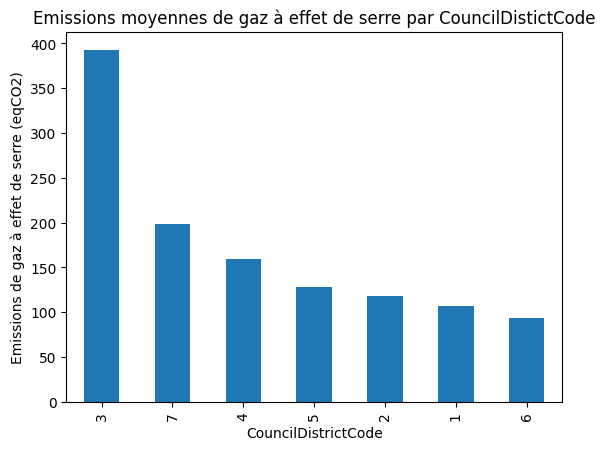

In [82]:
# Visualisation des emissions de gaz à effet de serre moyennes par quariter : 
grouped_data = data.groupby('CouncilDistrictCode')['TotalGHGEmissions'].mean().sort_values(ascending=False)

plt.figure()
grouped_data.plot(kind='bar')
plt.title('Emissions moyennes de gaz à effet de serre par CouncilDistictCode')
plt.ylabel('Emissions de gaz à effet de serre (eqCO2)')
plt.show()

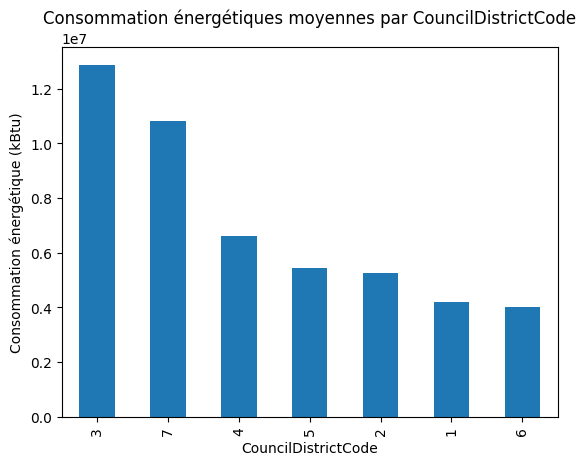

In [83]:
# Visualisation des consommations d'energie moyennes par quartier : 
grouped_data = data.groupby('CouncilDistrictCode')['SiteEnergyUse(kBtu)'].mean().sort_values(ascending=False)

plt.figure()
grouped_data.plot(kind='bar')
plt.title('Consommation énergétiques moyennes par CouncilDistrictCode')
plt.ylabel('Consommation énergétique (kBtu)')
plt.show()

del grouped_data

### 13. <a id='toc13_'></a>[Localisation des types de bâtiment](#toc0_)

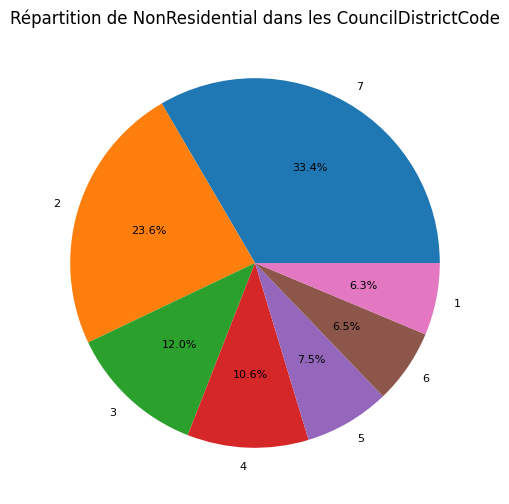

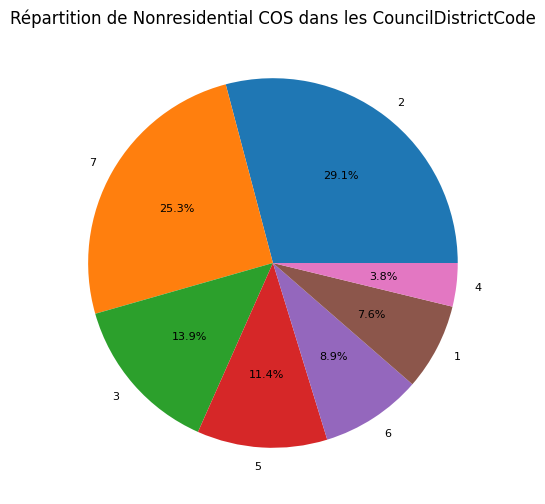

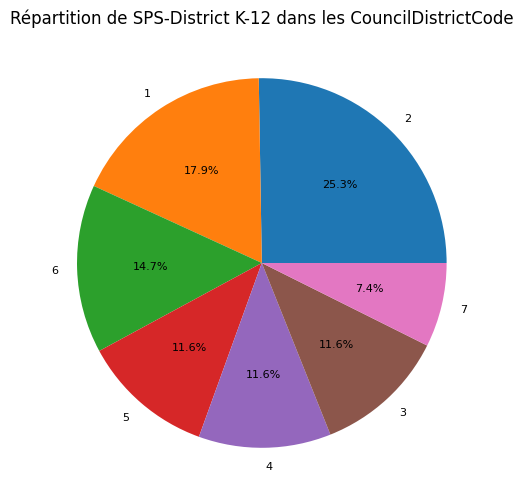

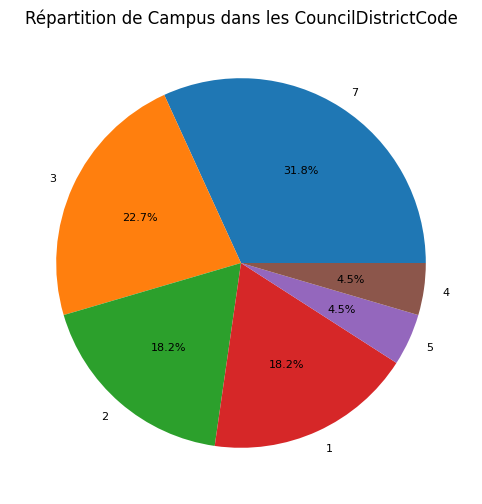

In [84]:
# Visualisation de la répartition des types de bâtiment par quartier :
ls = list(data['BuildingType'].unique())


for building in ls:
    serie = data.loc[data['BuildingType'] == building, 'CouncilDistrictCode'].value_counts()
    plt.figure(figsize=(8,6))
    plt.pie(serie.values, labels=serie.index, autopct='%1.1f%%', textprops={'fontsize': 8})
    plt.title(f'Répartition de {building} dans les CouncilDistrictCode')
    plt.show()

del ls

### 14. <a id='toc14_'></a>[Profils énergétique](#toc0_)
#### 14.1. <a id='toc14_1_'></a>[Répartition des consommations énergétique](#toc0_)

In [85]:
# Création des colonnes de ratio énergétique : 
col_energie = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

col_energie_ratio = ['SteamUse_ratio', 'Electricity_ratio', 'NaturalGas_ratio']

for old_col, new_col in zip(col_energie, col_energie_ratio): 
    data[new_col] = data[old_col]/data['SiteEnergyUse(kBtu)']


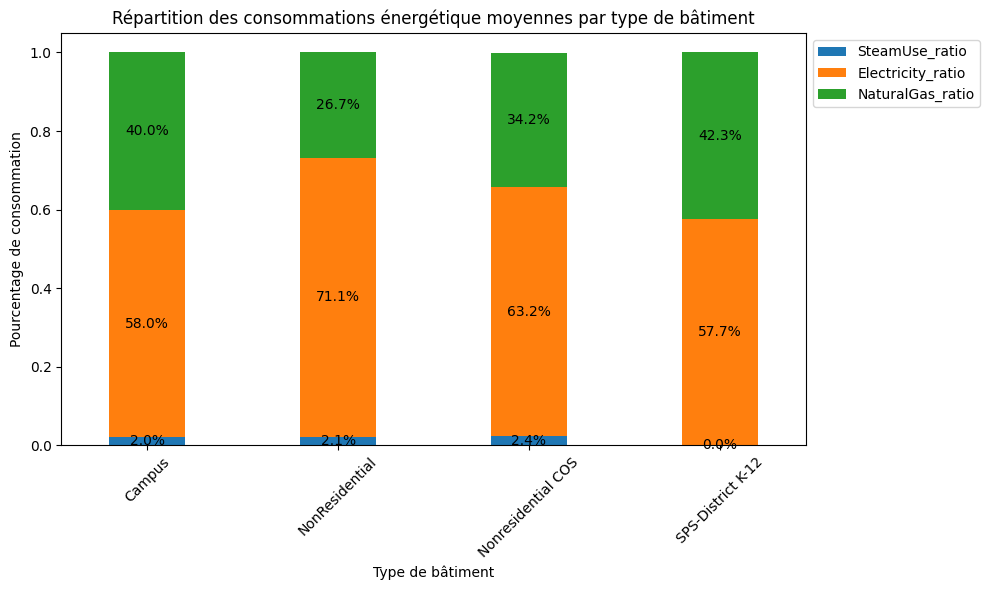

In [86]:
# Visualisation : 

# Création des données : 
grouped_data = data.groupby('BuildingType')[col_energie_ratio].mean()

# Création du graphique : 
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.4)


# Ajout des étiquettes de pourcentage : 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height * 100
    ax.annotate(f'{percentage:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    
# Propriétés du graphique :
plt.title("Répartition des consommations énergétique moyennes par type de bâtiment")
plt.xlabel('Type de bâtiment')
plt.ylabel('Pourcentage de consommation')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 14.2. <a id='toc14_2_'></a>[Définition de l'éenergie principale d'un bâtiment](#toc0_)

In [87]:
# Création d'une colonne energie_principale :
data['energie_principale'] = data[col_energie].apply(np.argmax, axis=1)

data['energie_principale'] = data['energie_principale'].map({0: 'Steam',
                                                             1: 'Electricity',
                                                             2: 'NaturalGas'})

In [88]:
# Création d'un df avec le pourcentage de bâtiment par énergie principale et par type de bâtiment : 

# Création de df : 
df = data.groupby('BuildingType')['energie_principale'].value_counts().to_frame('count')
df.reset_index(inplace=True)

# Remise en forme de df : 
df = df.pivot_table(index='BuildingType', columns='energie_principale', values='count', fill_value=0)

# Calcul des % de bâtiment : 
df = df.T
for col in df.columns:
    df[col] = df[col] / df[col].sum()

# Remise en forme de df : 
df = df.T
# Affichage de df : 
print('DataFrame df :')
df

DataFrame df :


energie_principale,Electricity,NaturalGas,Steam
BuildingType,,,
Campus,0.590909,0.409091,0.000000
NonResidential,0.755201,0.230236,0.014563
Nonresidential COS,0.632911,0.341772,0.025316
SPS-District K-12,0.610526,0.389474,0.000000


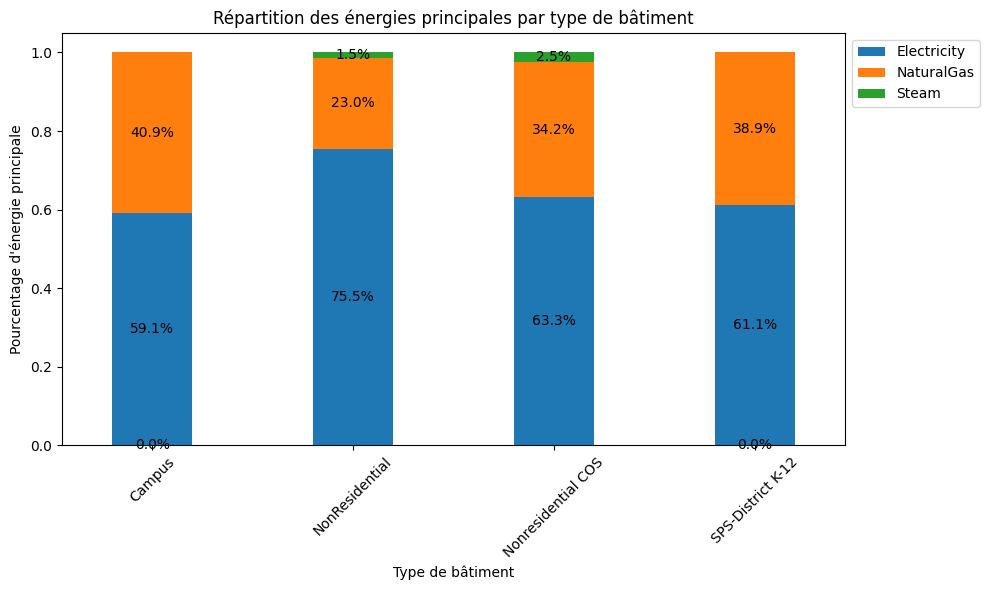

In [89]:
# Visualisation : 

# Création des données : 

# Création du graphique : 
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.4)


# Ajout des étiquettes de pourcentage : 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height * 100
    ax.annotate(f'{percentage:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    
# Propriétés du graphique :
plt.title("Répartition des énergies principales par type de bâtiment")
plt.xlabel('Type de bâtiment')
plt.ylabel("Pourcentage d'énergie principale")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Création des données pour la modélisation

### 15. <a id='toc15_'></a>[Création des DataFrames](#toc0_)
Séparation des variables dans différents DataFrames selon leur utilités pour la modélisation

In [90]:
# Création de différents dataframes : 

# Variables cibles :  
data_cible = data[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Variables pour l'étude de l'influence d'ENERGYSTARS : 
data_enrgystars = data[['ENERGYSTARScore', 'YearsENERGYSTARCertified']].copy()

# Variables prédictives (on retire toutes les données en lien direct avec les cibles) : 
data_var = data.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'YearsENERGYSTARCertified',
                      'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Emissions_par_batiment',
                      'Emissions_par_etage', 'Emissions_par_surface', 'Consommation_par_batiment', 'Consommation_par_etage',
                      'Consommation_par_surface'],
                     axis=1,
                    ).copy()

In [91]:
# Variables prédictives : 

print('Variables prédictives restantes :\n')
print(list(data_var.columns))

Variables prédictives restantes :

['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'age', 'CouncilDistrictCode', 'Neighborhood', 'ratio_surface_bâtiment', 'ratio_surface_parking', 'SteamUse_ratio', 'Electricity_ratio', 'NaturalGas_ratio', 'energie_principale']


OSEBuildingID, energie_principale --> variables inutiles pour la modélisation 

PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s) ratio_surface_bâtiment, ratio_surface_parking --> variables redondantes 

CouncilDistrictCode, Neighborhood --> variables redondantes

### 16. <a id='toc16_'></a>[Suppression des variables inutiles](#toc0_)

In [92]:
# Suppression de OSEBuildingID et energie_principale : 
data_var.drop(['OSEBuildingID', 'energie_principale'], axis=1, inplace=True)


### 17. <a id='toc17_'></a>[Sélection de la variable de localisation pour la modélisation](#toc0_)

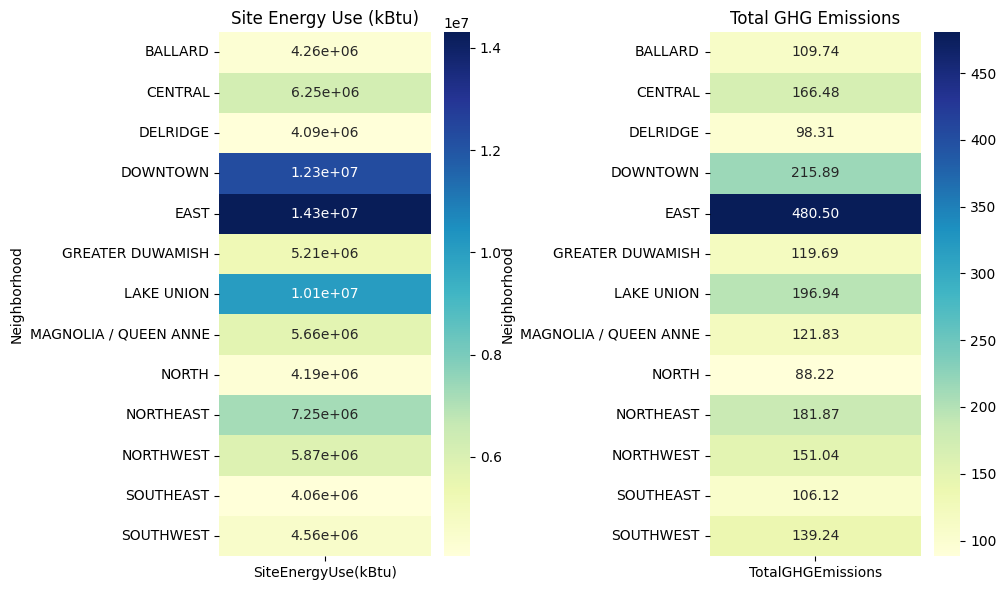

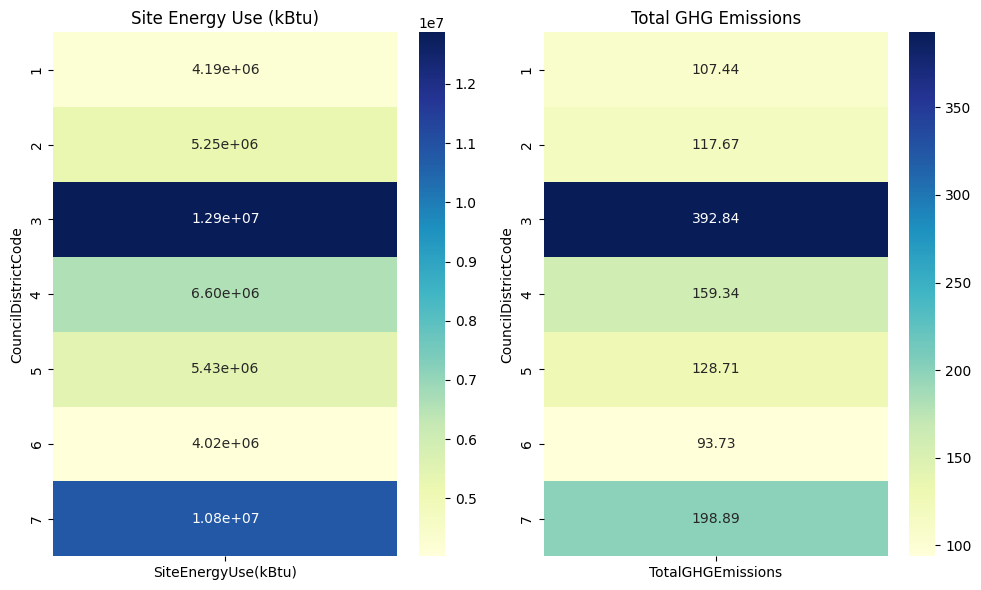

In [93]:
# Visualisation de l'impact des données de localisation sur les cibles : 

# Création de df pour Neighborhood : 
df = data.groupby('Neighborhood')[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].mean()

# Affichage des cartes de chaleurs : 
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df['SiteEnergyUse(kBtu)'].to_frame(), cmap='YlGnBu', annot=True, fmt=".2e")
plt.title('Site Energy Use (kBtu)')

plt.subplot(1, 2, 2)
sns.heatmap(df['TotalGHGEmissions'].to_frame(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Total GHG Emissions')

plt.tight_layout()
plt.show()

# Création de df pour CouncilDistrictCode : 
df = data.groupby('CouncilDistrictCode')[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].mean()

# Affichage des cartes de chaleurs : 
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df['SiteEnergyUse(kBtu)'].to_frame(), cmap='YlGnBu', annot=True, fmt=".2e")
plt.title('Site Energy Use (kBtu)')

plt.subplot(1, 2, 2)
sns.heatmap(df['TotalGHGEmissions'].to_frame(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Total GHG Emissions')

plt.tight_layout()
plt.show()

del df 

CouncilDistrictCode est mieux définit en temres d'impact sur les variables cibles --> suppression de Neighborhood

In [94]:
# Suppresion de Neighborhood : 
data_var.drop('Neighborhood', axis=1, inplace=True)

### 18. <a id='toc18_'></a>[Sélection des variables de surfaces](#toc0_)

Les variables ratio_surface_bâtiment et ratio_surface_parking ne donnent pas l'indication de la superficie et donc de l'étendu des bâtiments --> Supression. 

Avec les variables  PropertyGFAParking et PropertyGFABuilding(s), nous avons déjà l'information de PropertyGFATotal --> Suppresion de PropertyGFATotal. 

In [95]:
# Suppression de PropertyGFATotal ratio_surface_bâtiment et ratio_surface_parking : 
data_var.drop(['PropertyGFATotal', 'ratio_surface_bâtiment', 'ratio_surface_parking'], axis=1, inplace=True)

### 19. <a id='toc19_'></a>[Variables prédictives feature engineering 1](#toc0_)

In [96]:
# Variables prédictives feature engineering 1 : 

print('Variables de data_var :\n')
for x in data_var.columns:
    print(f'- {x}')
    
del x

Variables de data_var :

- BuildingType
- PrimaryPropertyType
- NumberofBuildings
- NumberofFloors
- PropertyGFAParking
- PropertyGFABuilding(s)
- age
- CouncilDistrictCode
- SteamUse_ratio
- Electricity_ratio
- NaturalGas_ratio


In [97]:
# Visualisation des données manquantes : 
data_var.isna().mean()

BuildingType              0.0
PrimaryPropertyType       0.0
NumberofBuildings         0.0
NumberofFloors            0.0
PropertyGFAParking        0.0
PropertyGFABuilding(s)    0.0
age                       0.0
CouncilDistrictCode       0.0
SteamUse_ratio            0.0
Electricity_ratio         0.0
NaturalGas_ratio          0.0
dtype: float64

### 20. <a id='toc20_'></a>[Création d'un feature engineering 2](#toc0_)
Création d'un data_var_2 avec les différents types secondaires et tertaires de bâtiment : LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA

In [98]:
# Création d'un nouveau data_var_2 : 

df = data_base[['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']]

ls_col_data_var = list(data_var.columns)
ls_col_df = list(df.columns)
ls_col_df.remove('OSEBuildingID')
data_index = data.index


data_var_2 = data.merge(df, on='OSEBuildingID', how='left')
data_var_2 = data_var_2.set_index(data_index)
data_var_2 = data_var_2[ls_col_data_var+ls_col_df]

print('Variables de data_var_2 :\n')
for x in data_var_2.columns:
    print(f'- {x}')
          
del df, ls_col_data_var, ls_col_df, x

Variables de data_var_2 :

- BuildingType
- PrimaryPropertyType
- NumberofBuildings
- NumberofFloors
- PropertyGFAParking
- PropertyGFABuilding(s)
- age
- CouncilDistrictCode
- SteamUse_ratio
- Electricity_ratio
- NaturalGas_ratio
- LargestPropertyUseType
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseType
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseType
- ThirdLargestPropertyUseTypeGFA


In [99]:
# Visualisation des données manquantes : 
data_var_2.isna().mean()

BuildingType                       0.000000
PrimaryPropertyType                0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
age                                0.000000
CouncilDistrictCode                0.000000
SteamUse_ratio                     0.000000
Electricity_ratio                  0.000000
NaturalGas_ratio                   0.000000
LargestPropertyUseType             0.002442
LargestPropertyUseTypeGFA          0.002442
SecondLargestPropertyUseType       0.484127
SecondLargestPropertyUseTypeGFA    0.484127
ThirdLargestPropertyUseType        0.786935
ThirdLargestPropertyUseTypeGFA     0.786935
dtype: float64

In [100]:
# Visualisation des valeurs manquantes de LargestPropertyUseType et LargestPropertyUseTypeGFA : 
data_var_2.loc[data_var_2['LargestPropertyUseType'].isna(), ['PrimaryPropertyType', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
                                                             'LargestPropertyUseType', 'LargestPropertyUseTypeGFA']]

,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA
353,Self-Storage Facility,111445,0,NaN,NaN
1147,Hotel,61721,0,NaN,NaN
2414,Small- and Mid-Sized Office,48350,0,NaN,NaN
2459,Restaurant,28800,0,NaN,NaN


Ramplacement des valeurs manquantes de LargestPropertyUseType par la valeurs la plus fréquente et de LargestPropertyUseTypeGFA par la valeur de PropertyGFABuilding(s)	

In [101]:
# Remplacement des valeurs manquantes de LargestPropertyUseType et LargestPropertyUseTypeGFA :

index = data_var_2.loc[data_var_2['LargestPropertyUseType'].isna()].index 

for i in index: 
    PPT = data_var_2.loc[i, 'PrimaryPropertyType']
    most_frequent_value = data_var_2.loc[data_var_2['PrimaryPropertyType'] == PPT, 'LargestPropertyUseType'].mode().iloc[0]
    
    
    data_var_2.loc[i, 'LargestPropertyUseType'] = most_frequent_value
    data_var_2.loc[i, 'LargestPropertyUseTypeGFA'] = data_var_2.loc[i, 'PropertyGFABuilding(s)']
    
del index, i, PPT, most_frequent_value

Pour les SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType et ThirdLargestPropertyUseTypeGFA, le pourcentage de valeurs manquantes est très important, celà peut signifier qu'il n'y a tout simplement pas de seconde ou troisième utilisation. 

Mise des valeurs manquante de SecondLargestPropertyUseType et ThirdLargestPropertyUseType à None
Mise des valeurs manquante de SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA à 0


In [102]:
# Remplacement des valeurs manquantes : 

for c in ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']:
    data_var_2[c]= data_var_2[c].fillna(0)
    
for c in ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    data_var_2[c] = data_var_2[c].fillna('None')

del c 

### 21. <a id='toc21_'></a>[Création d'un feature engineeering 3](#toc0_)
Créer un Encodage des variables de types de bâtiments personnalisés. 

Utilisation de BuildingType, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType. 

Création d'une colonne par catégorie présentes plus de 3 fois. 

Ramplissage des valeurs par : 
- la somme des surfaces correspondante pour LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType. 
- par PropertyGFATotal pour BuildingType

In [103]:
# Création de df avec les colonnes spécifiques : 
df = data_var_2[
    ['BuildingType',
     'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
     'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
     'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']
               ].copy()

df['PropertyGFATotal'] = data['PropertyGFATotal']

In [104]:
# Visualisation des données manquantes : 
df.isna().mean()

BuildingType                       0.0
LargestPropertyUseType             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseType       0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseType        0.0
ThirdLargestPropertyUseTypeGFA     0.0
PropertyGFATotal                   0.0
dtype: float64

In [105]:
# Transformation de df (une colonnne pas type de bâtiment) : 

# Création d'une colonne par type principal de bâtiment avec la valeur de GFATotal : 
df_2 = pd.get_dummies(df['BuildingType'], prefix='Type')

df = pd.concat([df, df_2], axis=1)

for building_type in df['BuildingType'].unique():
    col_name = f'Type_{building_type}'
    df[col_name] = data.apply(lambda row: row['PropertyGFATotal'] if row['BuildingType'] == building_type else 0, axis=1)
    
del df_2, col_name

# Création de la série comptant le nombre de chaque type de bâtiment présents dans les 3 colonnes : 
serie_count_use_type = pd.concat([df['LargestPropertyUseType'],
                      df['SecondLargestPropertyUseType'],
                      df['ThirdLargestPropertyUseType']]
                                ).value_counts()

# Filtre des types d'utilisation présents plus de 3 fois : 
serie_count_use_type = serie_count_use_type[serie_count_use_type >= 3]

# Récupération d'une liste de ces types d'utilisation de bâtiments : 
ls_use_type = serie_count_use_type.index.tolist()


# Création d'une fonction permettant d'obtenir la sommes des surfaces du type de bâtiment pour une ligne : 
def surface_totale(row, type_name): 
    surface_tot = 0 
    if row['LargestPropertyUseType'] == type_name:
        surface_tot += row['LargestPropertyUseTypeGFA']
    if row['SecondLargestPropertyUseType'] == type_name:
        surface_tot += row['SecondLargestPropertyUseTypeGFA']
    if row['ThirdLargestPropertyUseType'] == type_name:
        surface_tot += row['ThirdLargestPropertyUseTypeGFA']
    return surface_tot

# Ajout d'un colonne par type présent dans ls_use_type, et avec la somme des surfaces correspondanrtes : 
for type_name in ls_use_type: 
    df[type_name] = df.apply(lambda row: surface_totale(row, type_name), axis=1)

del serie_count_use_type, surface_totale, ls_use_type, type_name
    
# Suppression des colonnes de base de df : 
df.drop(['BuildingType', 'PropertyGFATotal',
         'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
         'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 
         'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'],
       axis=1, inplace=True)

In [106]:
# Colonnes de df : 
print('Colonnes de df :\n')
for x in df.columns: 
    print(f'\t- {x}')
    
del x

Colonnes de df :

	- Type_Campus
	- Type_NonResidential
	- Type_Nonresidential COS
	- Type_SPS-District K-12
	- None
	- Office
	- Parking
	- Non-Refrigerated Warehouse
	- Retail Store
	- Other
	- K-12 School
	- Hotel
	- Worship Facility
	- Restaurant
	- Distribution Center
	- Medical Office
	- Supermarket/Grocery Store
	- Other - Recreation
	- Self-Storage Facility
	- Other - Entertainment/Public Assembly
	- Multifamily Housing
	- Data Center
	- Fitness Center/Health Club/Gym
	- Residence Hall/Dormitory
	- Laboratory
	- College/University
	- Senior Care Community
	- Social/Meeting Hall
	- Other - Services
	- Bank Branch
	- Refrigerated Warehouse
	- Swimming Pool
	- Pre-school/Daycare
	- Manufacturing/Industrial Plant
	- Hospital (General Medical & Surgical)
	- Repair Services (Vehicle, Shoe, Locksmith, etc)
	- Food Service
	- Other - Restaurant/Bar
	- Financial Office
	- Automobile Dealership
	- Strip Mall
	- Other - Education
	- Other - Lodging/Residential
	- Museum
	- Other/Specialty

La colonne None est par défaut remplie à 0 --> Supression 

La colonne Parking est inutiles puisqu'on utilise déjà PropertyGFAParking --> Suppression

In [107]:
# Suppression des colonnes None et Parking : 
df.drop(['None', 'Parking'], axis=1, inplace=True)

print('Colonnes de df :\n')
for x in df.columns: 
    print(f'\t- {x}')
    
del x

Colonnes de df :

	- Type_Campus
	- Type_NonResidential
	- Type_Nonresidential COS
	- Type_SPS-District K-12
	- Office
	- Non-Refrigerated Warehouse
	- Retail Store
	- Other
	- K-12 School
	- Hotel
	- Worship Facility
	- Restaurant
	- Distribution Center
	- Medical Office
	- Supermarket/Grocery Store
	- Other - Recreation
	- Self-Storage Facility
	- Other - Entertainment/Public Assembly
	- Multifamily Housing
	- Data Center
	- Fitness Center/Health Club/Gym
	- Residence Hall/Dormitory
	- Laboratory
	- College/University
	- Senior Care Community
	- Social/Meeting Hall
	- Other - Services
	- Bank Branch
	- Refrigerated Warehouse
	- Swimming Pool
	- Pre-school/Daycare
	- Manufacturing/Industrial Plant
	- Hospital (General Medical & Surgical)
	- Repair Services (Vehicle, Shoe, Locksmith, etc)
	- Food Service
	- Other - Restaurant/Bar
	- Financial Office
	- Automobile Dealership
	- Strip Mall
	- Other - Education
	- Other - Lodging/Residential
	- Museum
	- Other/Specialty Hospital
	- Other 

In [108]:
# Création de data_var_3 pour le feature engineering 3 :

# Récupération des colonnes de data_var et df :
ls_col_df = list(df.columns)
ls_col_data_var = list(data_var.columns)

# Suppression des colonnes BuildingType et PrimaryPropertyType (car utilisation des nouvelles colonnes de df) : 
ls_col_data_var.remove('BuildingType')
ls_col_data_var.remove('PrimaryPropertyType')

# Création de data_var_3 : 
data_var_3 = pd.concat([data_var, df], axis=1)
data_var_3 = data_var_3[ls_col_data_var+ls_col_df]

del ls_col_data_var, ls_col_df, df

### 22. <a id='toc22_'></a>[Création d'un feature engineering 4 (avec Energystarscore)](#toc0_)

In [109]:
# Création d'un nouveau data_var_4 : 
# Copie de data_var_3 : 
data_var_4 = data_var_3.copy()

# Ajout de la colonne ENERGYSTARTScore : 
data_var_4['ENERGYSTARScore'] = data['ENERGYSTARScore']

# Affichage des colonnes de data_var_4 : 
print('Variables de data_var_4 :\n')
for x in data_var_4.columns:
    print(f'- {x}')


Variables de data_var_4 :

- NumberofBuildings
- NumberofFloors
- PropertyGFAParking
- PropertyGFABuilding(s)
- age
- CouncilDistrictCode
- SteamUse_ratio
- Electricity_ratio
- NaturalGas_ratio
- Type_Campus
- Type_NonResidential
- Type_Nonresidential COS
- Type_SPS-District K-12
- Office
- Non-Refrigerated Warehouse
- Retail Store
- Other
- K-12 School
- Hotel
- Worship Facility
- Restaurant
- Distribution Center
- Medical Office
- Supermarket/Grocery Store
- Other - Recreation
- Self-Storage Facility
- Other - Entertainment/Public Assembly
- Multifamily Housing
- Data Center
- Fitness Center/Health Club/Gym
- Residence Hall/Dormitory
- Laboratory
- College/University
- Senior Care Community
- Social/Meeting Hall
- Other - Services
- Bank Branch
- Refrigerated Warehouse
- Swimming Pool
- Pre-school/Daycare
- Manufacturing/Industrial Plant
- Hospital (General Medical & Surgical)
- Repair Services (Vehicle, Shoe, Locksmith, etc)
- Food Service
- Other - Restaurant/Bar
- Financial Office

In [110]:
# Visualisation des données manquantes :
data_var_4.isna().mean()

NumberofBuildings                                       0.000000
NumberofFloors                                          0.000000
PropertyGFAParking                                      0.000000
PropertyGFABuilding(s)                                  0.000000
age                                                     0.000000
                                                          ...   
Personal Services (Health/Beauty, Dry Cleaning, etc)    0.000000
Prison/Incarceration                                    0.000000
Bar/Nightclub                                           0.000000
Convenience Store without Gas Station                   0.000000
ENERGYSTARScore                                         0.339438
Length: 65, dtype: float64

Pour une première étude de l'utilité de l'ENERGYSTARScore, suppression de toutes les lignes sans valeurs 

In [111]:
# Suppression des lignes sans ENERGYSTARScore : 
data_var_4 = data_var_4.dropna(subset=['ENERGYSTARScore'])

In [112]:
# Création d'un data_cible_2 (avec les mêmes lignes que data_var_4) : 
index = data_var_4.index

data_cible_2 = data_cible.loc[index]

del index

#### 22.1. <a id='toc22_1_'></a>[Création d'un data_var_5  (avec Energystarscore imputé sur l'ensemble des lignes)](#toc0_)

In [113]:
# Création de data_var_5 : 

# Copie de data_var_3 : 
data_var_5 = data_var_3.copy()

# Ajout de la colonne ENERGYSTARTScore : 
data_var_5['ENERGYSTARScore'] = data['ENERGYSTARScore']

# Affichage des colonnes de data_var_4 : 
print('Variables de data_var_5 :\n')
for x in data_var_4.columns:
    print(f'- {x}')


Variables de data_var_5 :

- NumberofBuildings
- NumberofFloors
- PropertyGFAParking
- PropertyGFABuilding(s)
- age
- CouncilDistrictCode
- SteamUse_ratio
- Electricity_ratio
- NaturalGas_ratio
- Type_Campus
- Type_NonResidential
- Type_Nonresidential COS
- Type_SPS-District K-12
- Office
- Non-Refrigerated Warehouse
- Retail Store
- Other
- K-12 School
- Hotel
- Worship Facility
- Restaurant
- Distribution Center
- Medical Office
- Supermarket/Grocery Store
- Other - Recreation
- Self-Storage Facility
- Other - Entertainment/Public Assembly
- Multifamily Housing
- Data Center
- Fitness Center/Health Club/Gym
- Residence Hall/Dormitory
- Laboratory
- College/University
- Senior Care Community
- Social/Meeting Hall
- Other - Services
- Bank Branch
- Refrigerated Warehouse
- Swimming Pool
- Pre-school/Daycare
- Manufacturing/Industrial Plant
- Hospital (General Medical & Surgical)
- Repair Services (Vehicle, Shoe, Locksmith, etc)
- Food Service
- Other - Restaurant/Bar
- Financial Office

In [114]:
# Visualisation des données manquantes :
data_var_5.isna().mean()

NumberofBuildings                                       0.000000
NumberofFloors                                          0.000000
PropertyGFAParking                                      0.000000
PropertyGFABuilding(s)                                  0.000000
age                                                     0.000000
                                                          ...   
Personal Services (Health/Beauty, Dry Cleaning, etc)    0.000000
Prison/Incarceration                                    0.000000
Bar/Nightclub                                           0.000000
Convenience Store without Gas Station                   0.000000
ENERGYSTARScore                                         0.339438
Length: 65, dtype: float64

In [115]:
# Imputation des valeurs manquantes avec KNNImputer : 

cols_to_impute = list(data_var_5.columns)

# Création de l'imputer : 
imputer = KNNImputer(n_neighbors=3)

# Création de df (avec ENERGYSTARScore imputé) : 
df = pd.DataFrame(imputer.fit_transform(data_var_5[cols_to_impute]), columns=cols_to_impute)

#Ré-indéxation de data_var_5 pour le remplacement de la colonne : 
data_var_5 = data_var_5.reset_index(drop=True)

# Remplacement de la colonne de data_var_5 : 
data_var_5['ENERGYSTARScore'] = df['ENERGYSTARScore']

del cols_to_impute, imputer, df

In [116]:
# Visualisation des données manquantes :
data_var_5.isna().mean()

NumberofBuildings                                       0.0
NumberofFloors                                          0.0
PropertyGFAParking                                      0.0
PropertyGFABuilding(s)                                  0.0
age                                                     0.0
                                                       ... 
Personal Services (Health/Beauty, Dry Cleaning, etc)    0.0
Prison/Incarceration                                    0.0
Bar/Nightclub                                           0.0
Convenience Store without Gas Station                   0.0
ENERGYSTARScore                                         0.0
Length: 65, dtype: float64

### 23. <a id='toc23_'></a>[Enregistrement des fichiers](#toc0_)

#### 23.1. <a id='toc23_1_'></a>[Reset des index](#toc0_)

In [117]:
# Reset de l'ensemble des index : 
data_cible = data_cible.reset_index(drop=True)
data_var = data_var.reset_index(drop=True)
data_var_2 = data_var_2.reset_index(drop=True)
data_var_3 = data_var_3.reset_index(drop=True)
data_var_4 = data_var_4.reset_index(drop=True)
data_cible_2 = data_cible_2.reset_index(drop=True)
data_var_5 = data_var_5.reset_index(drop=True)

### 23.2. <a id='toc23_2_'></a>[Enregistrement](#toc0_)

In [118]:
# Enregistrement des datasets :

dossier = '2. Sauvegardes/'

name = 'data_var'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_var, f)

name = 'data_var_2'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_var_2, f)
    
name = 'data_var_3'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_var_3, f)
    
name = 'data_var_4'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_var_4, f)
    
name = 'data_var_5'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_var_5, f)
    
name = 'data_cible'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_cible, f)

name = 'data_cible_2'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_cible_2, f)
    
name = 'data_enrgystars'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_enrgystars, f)
    
name = 'data_base'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data_base, f)
    
name = 'data'
with open(dossier + name + '.pickle', 'wb') as f:
    pickle.dump(data, f)

del dossier, name